# Visualizing metadata
## **Content:**
### 1. Barplots
### 2. Mosaic figures
### 3. Heatmaps with Pearson correlation (failed)
### 4. Heatmaps with ggplot viridis

In [27]:
library(tidyverse, warn.conflicts = FALSE)
library(RColorBrewer)
library(viridis)
library(cowplot, warn.conflicts = FALSE)
library(patchwork)
library(ggsci)
library(vcd)
library(pheatmap)
library(svglite)
library(umap)
setwd("/home/vanda.marosi//floral_development_thesis_vm/datatables")
theme_set(theme_bw())

In [3]:
# import data
wheat <- read.table("wheat_final.csv", header = TRUE, sep = ",", stringsAsFactors = TRUE)
w <- select(wheat, Run.ID, Dataset, Batch, Organism, Cultivar, GM, Zadok_scale, Intermediate_age, High_level_age, Intermediate_tissue, High_level_tissue, Treatment, RNA_extraction, RNA_enrichment, RNA_input..microg., PCR_purification, Growth_condition, Day_night_condition, Temperature_day_night_c, Growth_location, Seq_location, Instrument, Library.layout)
colnames(w) <- c("ID", "dataset", "batch", "organism", "cultivar", "gm", "zadoc_scale", "intermediate_age", "high_level_age", "intermediate_tissue", "high_level_tissue", "treatment", "rna_extraction", "rna_enrichment", "rna_input", "pcr_purification", "growth_condition", "day_night", "temp", "growth_location", "seq_location", "instrument", "library")

barley <- read.table("barley_final.csv", header = TRUE, sep = ",", stringsAsFactors = TRUE)
b <- select(barley, Run.ID, Dataset, Batch, Organism, Cultivar, GM, Zadok_scale, Intermediate_age, High_level_age, Intermediate_tissue, High_level_tissue, Treatment, RNA_extraction, RNA_enrichment, RNA_input..microg., PCR_purification, Growth_condition, Day_night_condition, Temperature_day_night_c, Growth_location, Seq_location, Instrument, Library.layout)
colnames(b) <- c("ID", "dataset", "batch", "organism", "cultivar", "gm", "zadoc_scale", "intermediate_age", "high_level_age", "intermediate_tissue", "high_level_tissue", "treatment", "rna_extraction", "rna_enrichment", "rna_input", "pcr_purification", "growth_condition", "day_night", "temp", "growth_location", "seq_location", "instrument", "library")

glimpse(w)

Rows: 215
Columns: 23
$ ID                  <fct> SRR10737427, SRR10737428, SRR10737429, SRR1073743…
$ dataset             <fct> cytoplasmic_male_sterility, cytoplasmic_male_ster…
$ batch               <int> 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6…
$ organism            <fct> Triticum aestivum, Triticum aestivum, Triticum ae…
$ cultivar            <fct> 303-B, 303-B, 303-B, C303A, C303A, C303A, B706, B…
$ gm                  <fct> wt, wt, wt, mut, mut, mut, wt, wt, wt, mut, mut, …
$ zadoc_scale         <int> 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 5…
$ intermediate_age    <fct> Heading, Heading, Heading, Heading, Heading, Head…
$ high_level_age      <fct> Reproductive, Reproductive, Reproductive, Reprodu…
$ intermediate_tissue <fct> anther, anther, anther, anther, anther, anther, a…
$ high_level_tissue   <fct> inflorescence, inflorescence, inflorescence, infl…
$ treatment           <fct> control, control, control, mutant, mutant, mutant…
$ rna_extraction      <fct> tr

### Subsetting categorical variables: 
* **technical variables:** "ID", "dataset", "treatment", "batch", "rna_extraction", "rna_enrichment", "rna_input", "pcr_purification", "growth_condition", "day_night", "temp", "growth_location", "seq_location", "instrument", "library"
* **biological variables:** "cultivar", "gm", "zadoc_scale", "intermediate_age", "high_level_age", "intermediate_tissue", "high_level_tissue",
* not-shared variables: ID, dataset, cultivar

In [4]:
# separate shared variables from metadata
mix <- bind_rows(b, w)
shared <- select(mix, ID, organism, gm, treatment, zadoc_scale, intermediate_age, high_level_age, intermediate_tissue, high_level_tissue, rna_extraction, rna_enrichment, rna_input, pcr_purification, growth_condition, day_night, temp, growth_location, seq_location, instrument, library)
glimpse(shared)

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning mess

Rows: 455
Columns: 20
$ ID                  <chr> "ERR781039", "ERR781040", "ERR781041", "ERR781042…
$ organism            <chr> "Hordeum vulgare", "Hordeum vulgare", "Hordeum vu…
$ gm                  <fct> wt, wt, wt, mut, mut, mut, wt, wt, wt, wt, wt, wt…
$ treatment           <chr> "control", "control", "control", "mutant", "mutan…
$ zadoc_scale         <int> 9, 9, 9, 11, 11, 11, 11, 11, 11, 14, 14, 14, 14, …
$ intermediate_age    <chr> "Germination", "Germination", "Germination", "Lea…
$ high_level_age      <chr> "Seedling", "Seedling", "Seedling", "Vegetative",…
$ intermediate_tissue <chr> "apex", "apex", "apex", "apex", "apex", "apex", "…
$ high_level_tissue   <chr> "meristem", "meristem", "meristem", "meristem", "…
$ rna_extraction      <chr> "trizol", "trizol", "trizol", "trizol", "trizol",…
$ rna_enrichment      <chr> "Rneasy_microkit_Qiagen", "Rneasy_microkit_Qiagen…
$ rna_input           <chr> "unknown", "unknown", "unknown", "unknown", "unkn…
$ pcr_purification    <chr> "u

setwd("/home/vanda.marosi//floral_development_thesis_vm/datatables")
write.table(shared, file = "shared_metadata.csv", sep = ",", col.names = TRUE, row.names = FALSE)

# 1. Barplots

In [5]:
setwd("/home/vanda.marosi/floral_development_thesis_vm/figures/")
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 200)
w$dataset <- factor(w$dataset)
w1 <- w %>% group_by(library, dataset) %>% summarise(total = n()) %>% arrange(desc(total)) %>% 
    ggplot(aes(x = reorder(dataset, -total), y = total, fill = library)) + 
    geom_col() + 
    labs(x = "Datasets") + 
    labs(y = "No of wheat samples") + 
    scale_x_discrete(labels = c("Developmental series", "Transcription factor Q", "Drought tolerance", "Isonucleic alloplasmic MS",
                                "Early spike development", "Embryo development", "Isogenic line ms2", "Spike development",
                               "Awn development", "Inflorescence development", "Meiosis", "Chlorophyll deficiency", "Cleistogamious wheat",
                               "Cytoplasmic MS", "Line ms1", "Multiovary wheat", "Thermosensitive MS", "Tiller number mutant", "Pistillody stamen")) +
    coord_flip() +
    guides(fill=guide_legend(title="Library layout")) +
    scale_fill_manual(labels = c("paired reads", "single reads"), values = c("tan3", "peachpuff2")) +
    theme(
    legend.position = c(.95, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6))
b$dataset <- factor(b$dataset)
b1 <- b %>% group_by(library, dataset) %>% summarise(total = n()) %>% arrange(desc(total)) %>% 
    ggplot(aes(x = reorder(dataset, -total), y = total, fill = library)) + 
    geom_col() + 
    labs(x = "") + 
    labs(y = "No of barley samples") + 
    scale_x_discrete(labels = c("Developmental stages", "Photoperiod mutant", "Rowtype mutant", "Drought", "Laxatum mutant", "Meiosis")) +
    coord_flip() +
    guides(fill=guide_legend(title="Library layout")) +
    scale_fill_manual(labels = c("paired reads", "single reads"), values = c("steelblue4", "steelblue2")) +
    theme(
    legend.position = c(.95, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6))
w$cultivar <- factor(w$cultivar)
w2 <- w %>% group_by(gm, cultivar) %>% summarise(total = n()) %>% arrange(desc(total)) %>% 
    ggplot(aes(x = reorder(cultivar, -total), y = total, fill = gm)) + 
    geom_col(position = "stack") + 
    labs(x = "Cultivars") + 
    labs(y = "No of wheat samples") + 
    coord_flip() +
    guides(fill=guide_legend(title="Genotype")) +
    scale_fill_manual(labels = c("mutant", "wild type"), values = c("peachpuff2", "tan3")) +
    theme(
    legend.position = c(.95, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6))
b$cultivar <- factor(b$cultivar)
b2 <- b %>% group_by(gm, cultivar) %>% summarise(total = n()) %>% arrange(desc(total)) %>% 
    ggplot(aes(x = reorder(cultivar, -total), y = total, fill = gm)) + 
    geom_col(position = "stack") + 
    labs(x = "") + 
    labs(y = "No of barley samples") + 
    coord_flip() +
    guides(fill=guide_legend(title="Genotype")) +
    scale_fill_manual(labels = c("mutant", "wild type"), values = c("steelblue2", "steelblue4")) +
    theme(
    legend.position = c(.95, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6))

In [6]:
setwd("/home/vanda.marosi/floral_development_thesis_vm/figures/")
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 200)
shared$intermediate_tissue <- factor(shared$intermediate_tissue)
t1 <- shared %>% group_by(organism, intermediate_tissue) %>% summarise(total = n()) %>% 
        ggplot(aes(x = reorder(intermediate_tissue, -total), y = total, fill = organism)) + 
        geom_col(position = "stack") + 
        labs(x = "Intermediate tissue") +
        labs(y = "No of samples") + 
        coord_flip() + 
        scale_fill_manual(values = c("steelblue4", "tan3"), name = "Species") +
        theme(
         legend.position = c(.95, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6))
shared$high_level_tissue <- factor(shared$high_level_tissue)
t2 <- shared %>% group_by(organism, high_level_tissue) %>% summarise(total = n()) %>% 
        ggplot(aes(x = reorder(high_level_tissue, -total), y = total, fill = organism)) + 
        geom_col(position = "stack") + 
        labs(x = "High-level tissue") +
        labs(y = "No of samples") + 
        coord_flip() + 
        scale_fill_manual(values = c("steelblue4", "tan3")) +
        guides(fill=guide_legend(title="Species")) +
        theme(
    legend.position = c(.95, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6))
#t1 + t2

In [7]:
setwd("/home/vanda.marosi/floral_development_thesis_vm/figures/")
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 200)
shared$zadoc_scale <- factor(shared$zadoc_scale)
a1 <- shared %>% group_by(organism, zadoc_scale) %>% summarise(total = n()) %>% 
        ggplot(aes(x = zadoc_scale, y = total, fill = organism)) + 
        geom_col(position = "stack") + 
        labs(x = "Zadok-scale") +
        labs(y = "No of samples") + 
        coord_flip() + 
        scale_fill_manual(values = c("steelblue3", "peachpuff2")) +
        guides(fill=guide_legend(title="Species")) +
        theme(
            legend.position = c(.95, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6),
    axis.text = element_text(size = 8))
shared$intermediate_age <- factor(shared$intermediate_age)
a2 <- shared %>% group_by(organism, intermediate_age) %>% summarise(total = n()) %>% 
        ggplot(aes(x = reorder(intermediate_age, -total), y = total, fill = organism)) + 
        geom_col(position = "dodge") + 
        labs(x = "Intermediate age") +
        labs(y = "No of samples") + 
        coord_flip() + 
        scale_fill_manual(values = c("steelblue3", "peachpuff2")) +
        guides(fill=guide_legend(title="Species")) +
        theme(
            legend.position = c(.95, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6))
shared$high_level_age <- factor(shared$high_level_age)
a3 <- shared %>% group_by(organism, high_level_age) %>% summarise(total = n()) %>% 
        ggplot(aes(x = reorder(high_level_age, -total), y = total, fill = organism)) + 
        geom_col(position = "dodge") + 
        labs(x = "High-level age") +
        labs(y = "No of samples") + 
        coord_flip() + 
        scale_fill_manual(values = c("steelblue3", "peachpuff2")) +
        guides(fill=guide_legend(title="Species")) +
        theme(
    legend.position = c(.95, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6))
#a4 <- (a2 + a3)/a1
#a4 + plot_annotation(tag_levels = 'A')

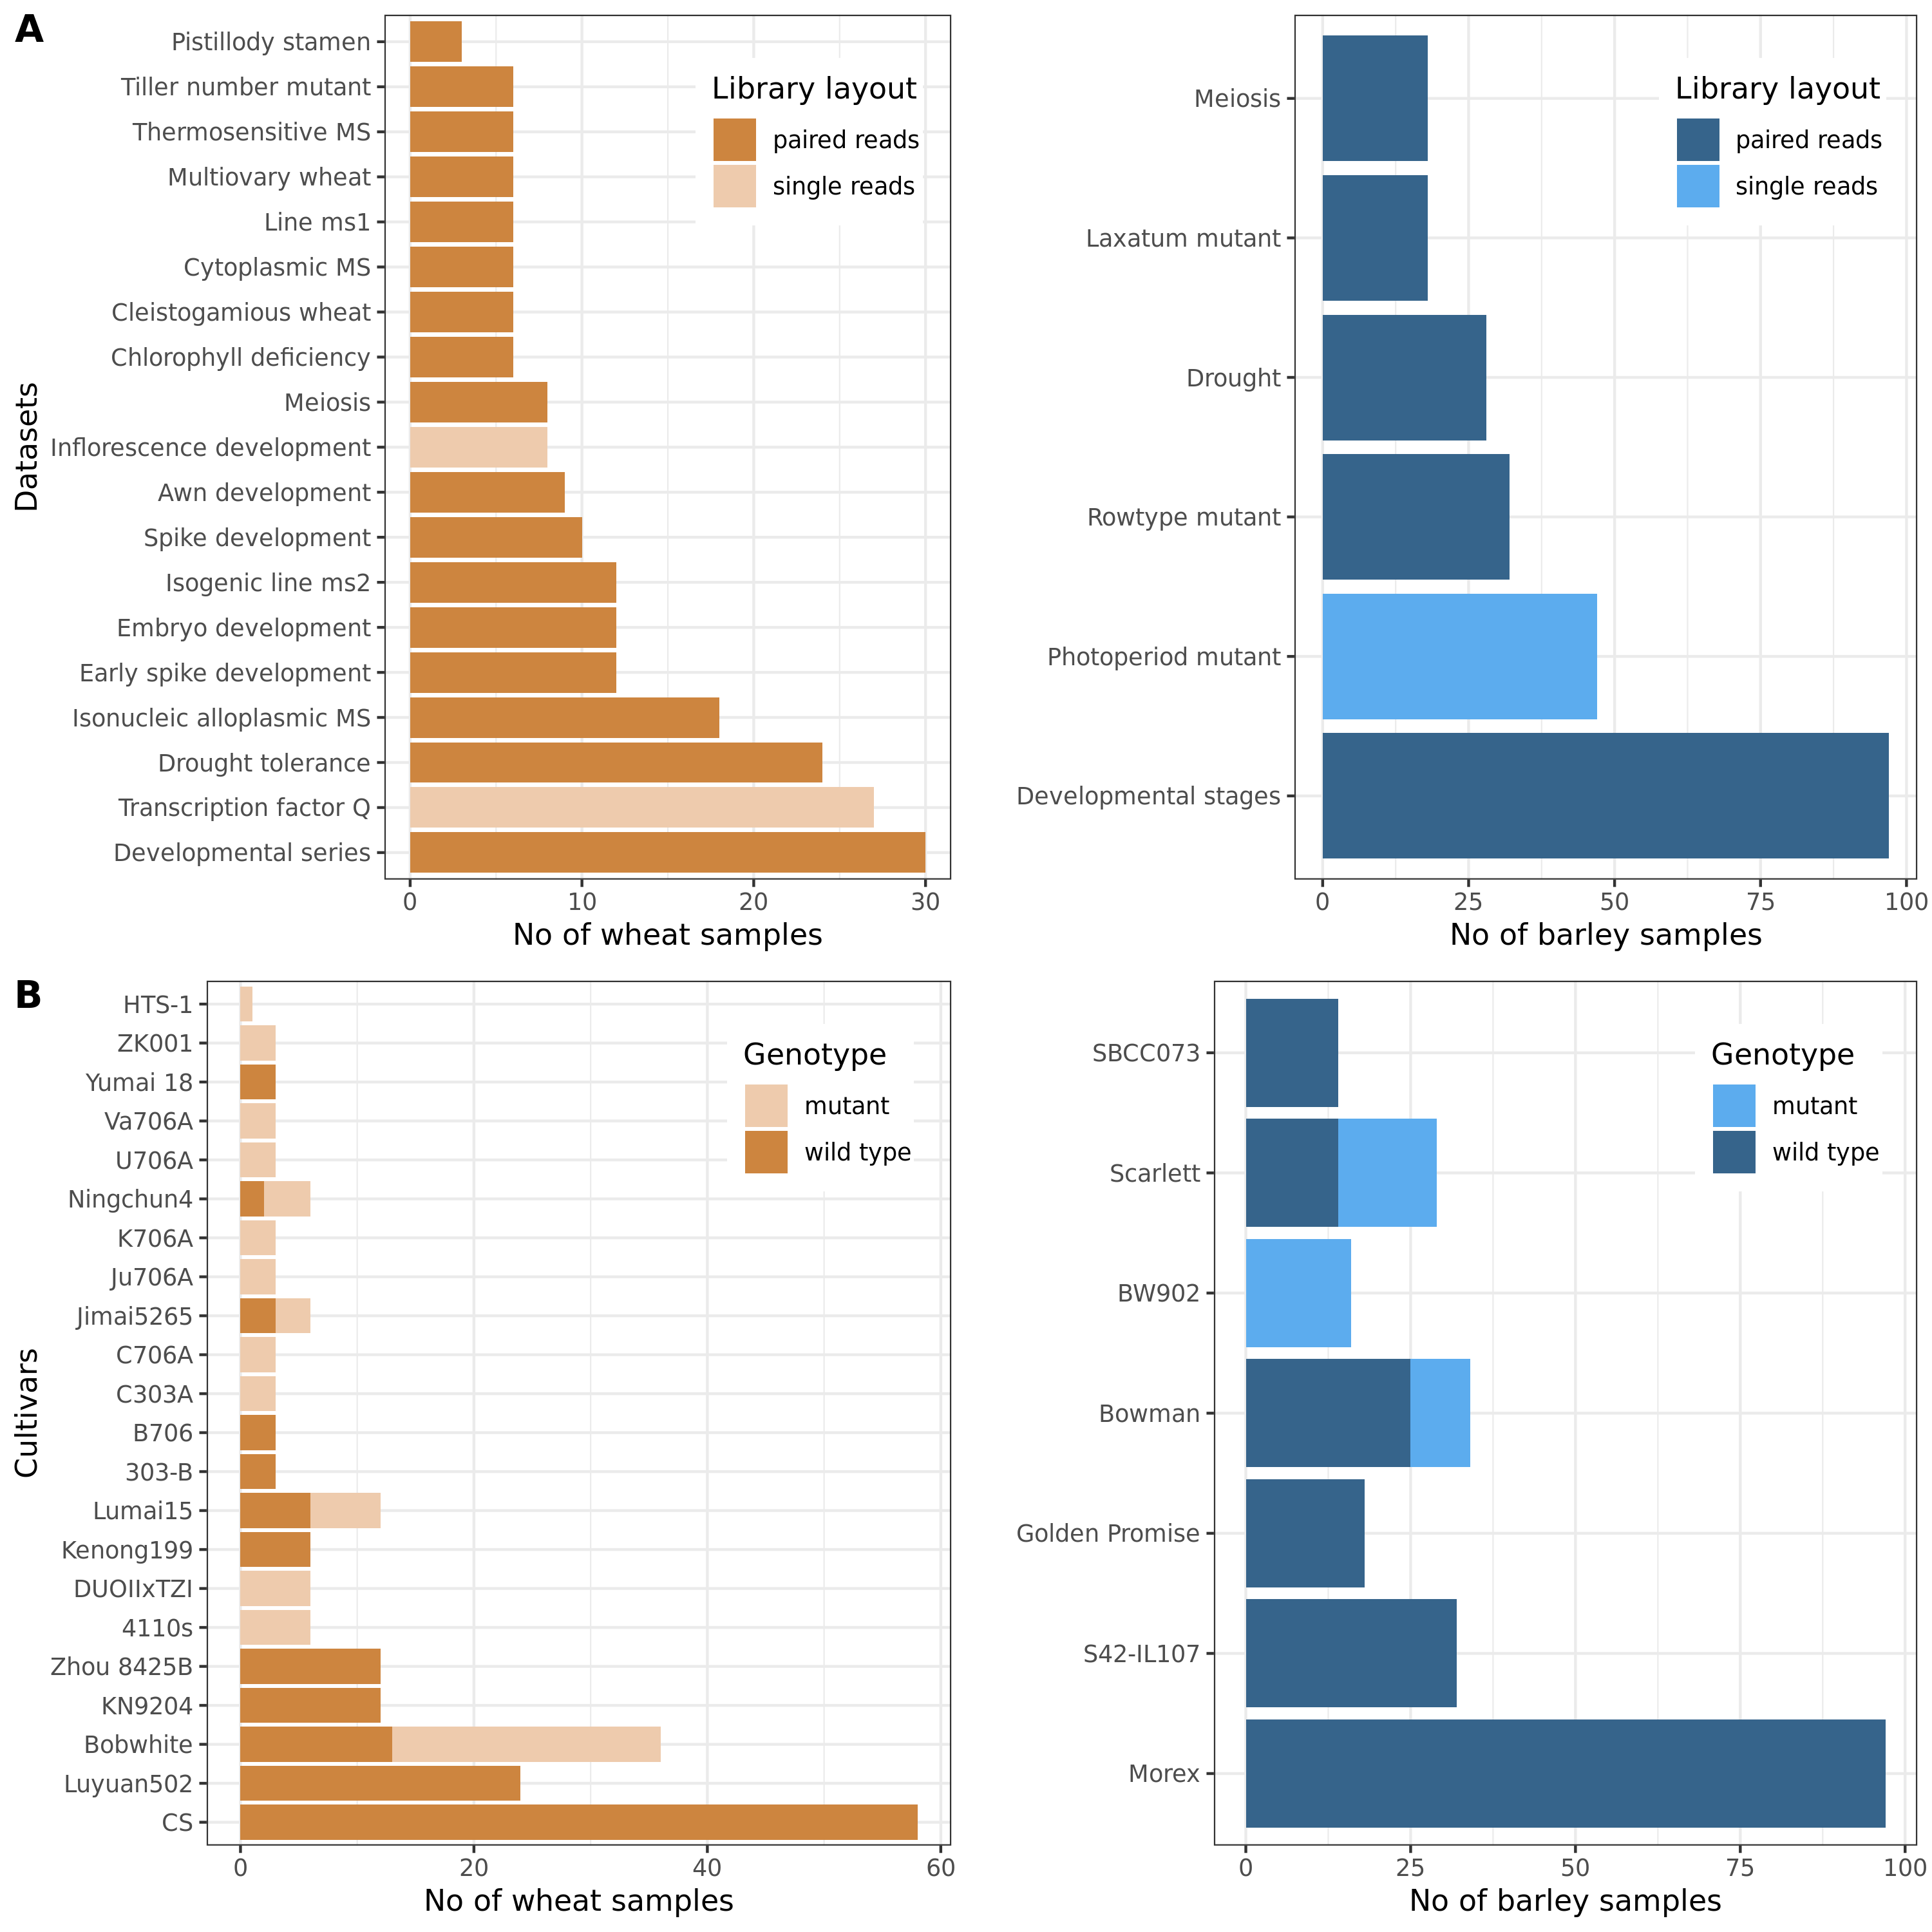

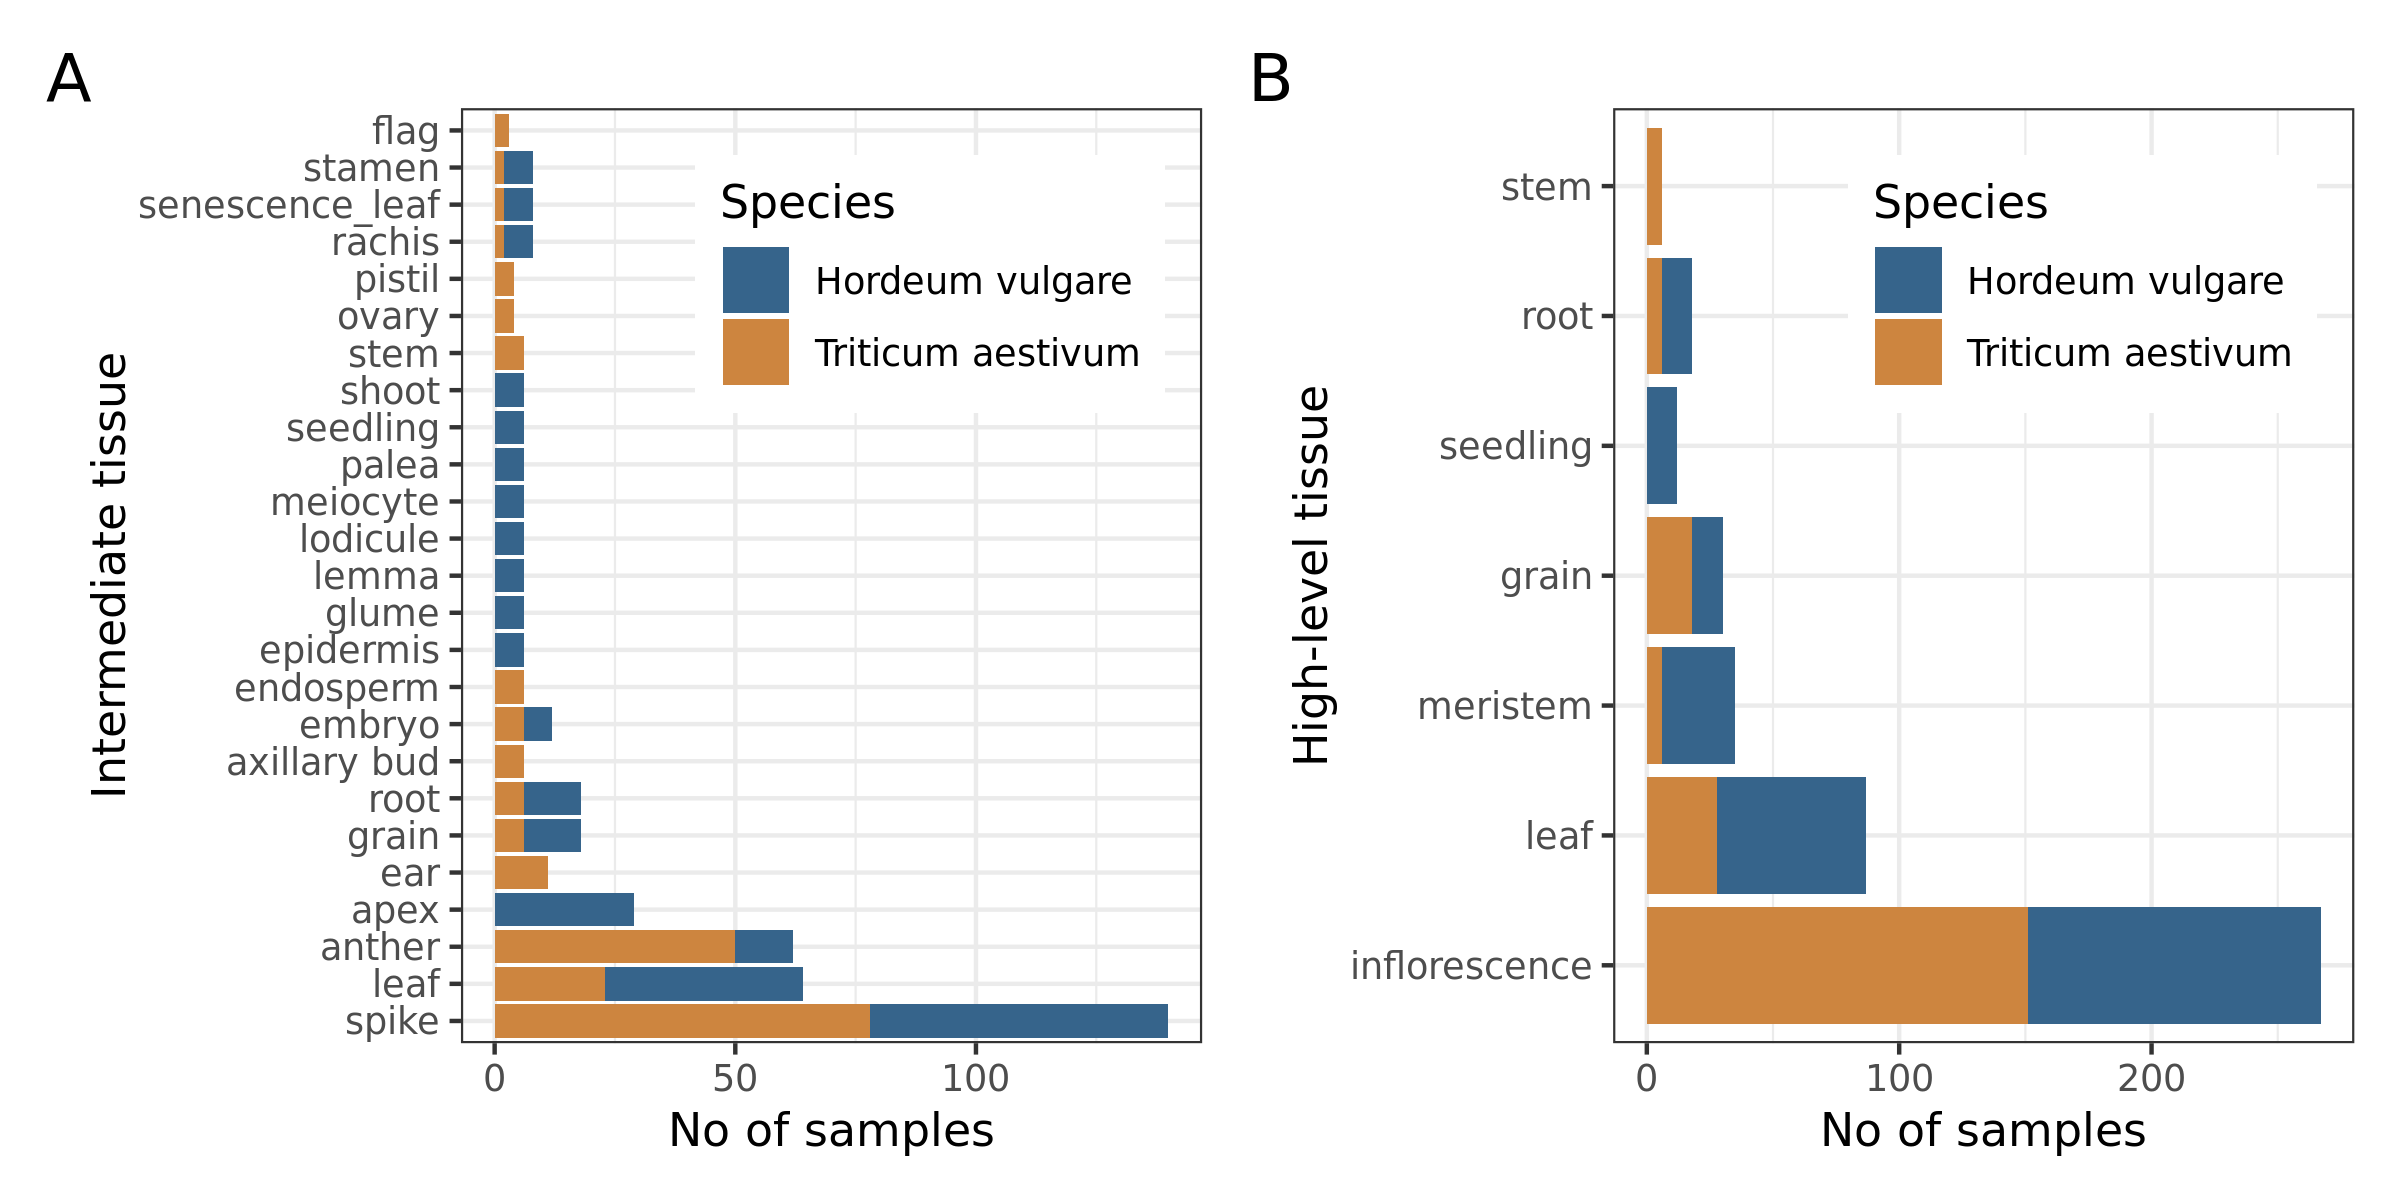

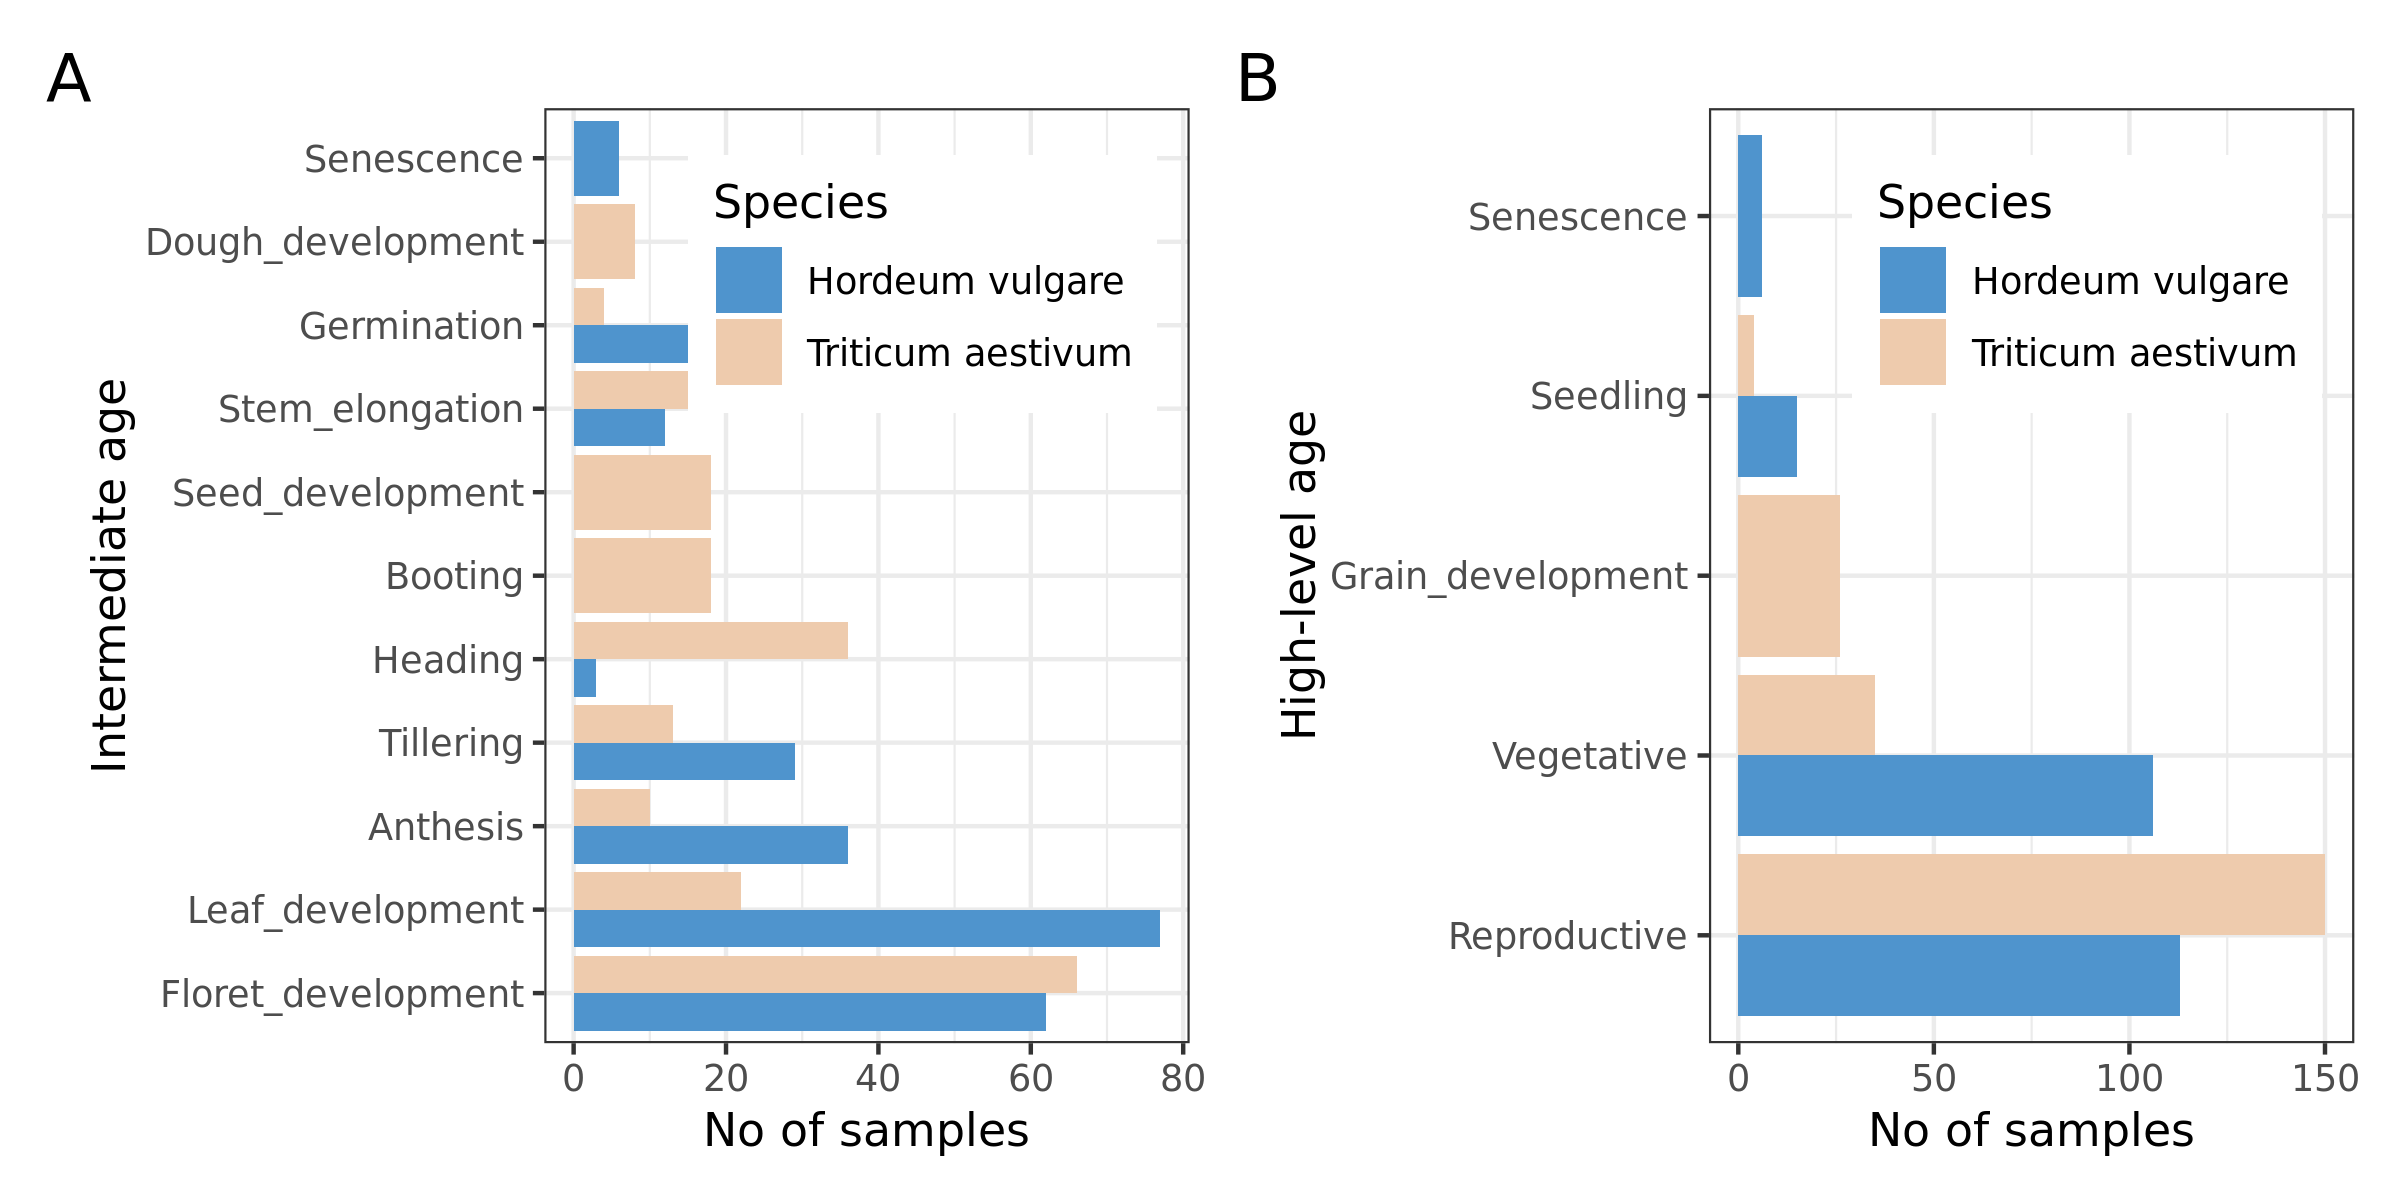

In [8]:
setwd("/home/vanda.marosi/floral_development_thesis_vm/figures/")
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)
# datasets 2 & cultivars 2
mainr <- plot_grid(w1, b1, w2, b2, labels = c("A", "", "B", ""), nrow = 2)
mainr
ggsave("main_metadata1.pdf", plot = mainr, width = 10, height = 10)

# these dont save! they are replaced with heatmaps:
main1 <- t1+t2 # int tissue & high tissue
main2 <- a2+a3 # int age & high age
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 300)
main1 +
 plot_annotation(tag_levels = 'A') & 
  theme(plot.tag = element_text(size = 16))
main2 +
 plot_annotation(tag_levels = 'A') & 
  theme(plot.tag = element_text(size = 16))

## 1.2 Supplementary figures 
* important tech variables: growth_condition, instrument, treatment, zadocs scale
* rna_extraction, rna_enrichment, rna_input, pcr_purification, 
* day_night, temp, growth_location, seq_location

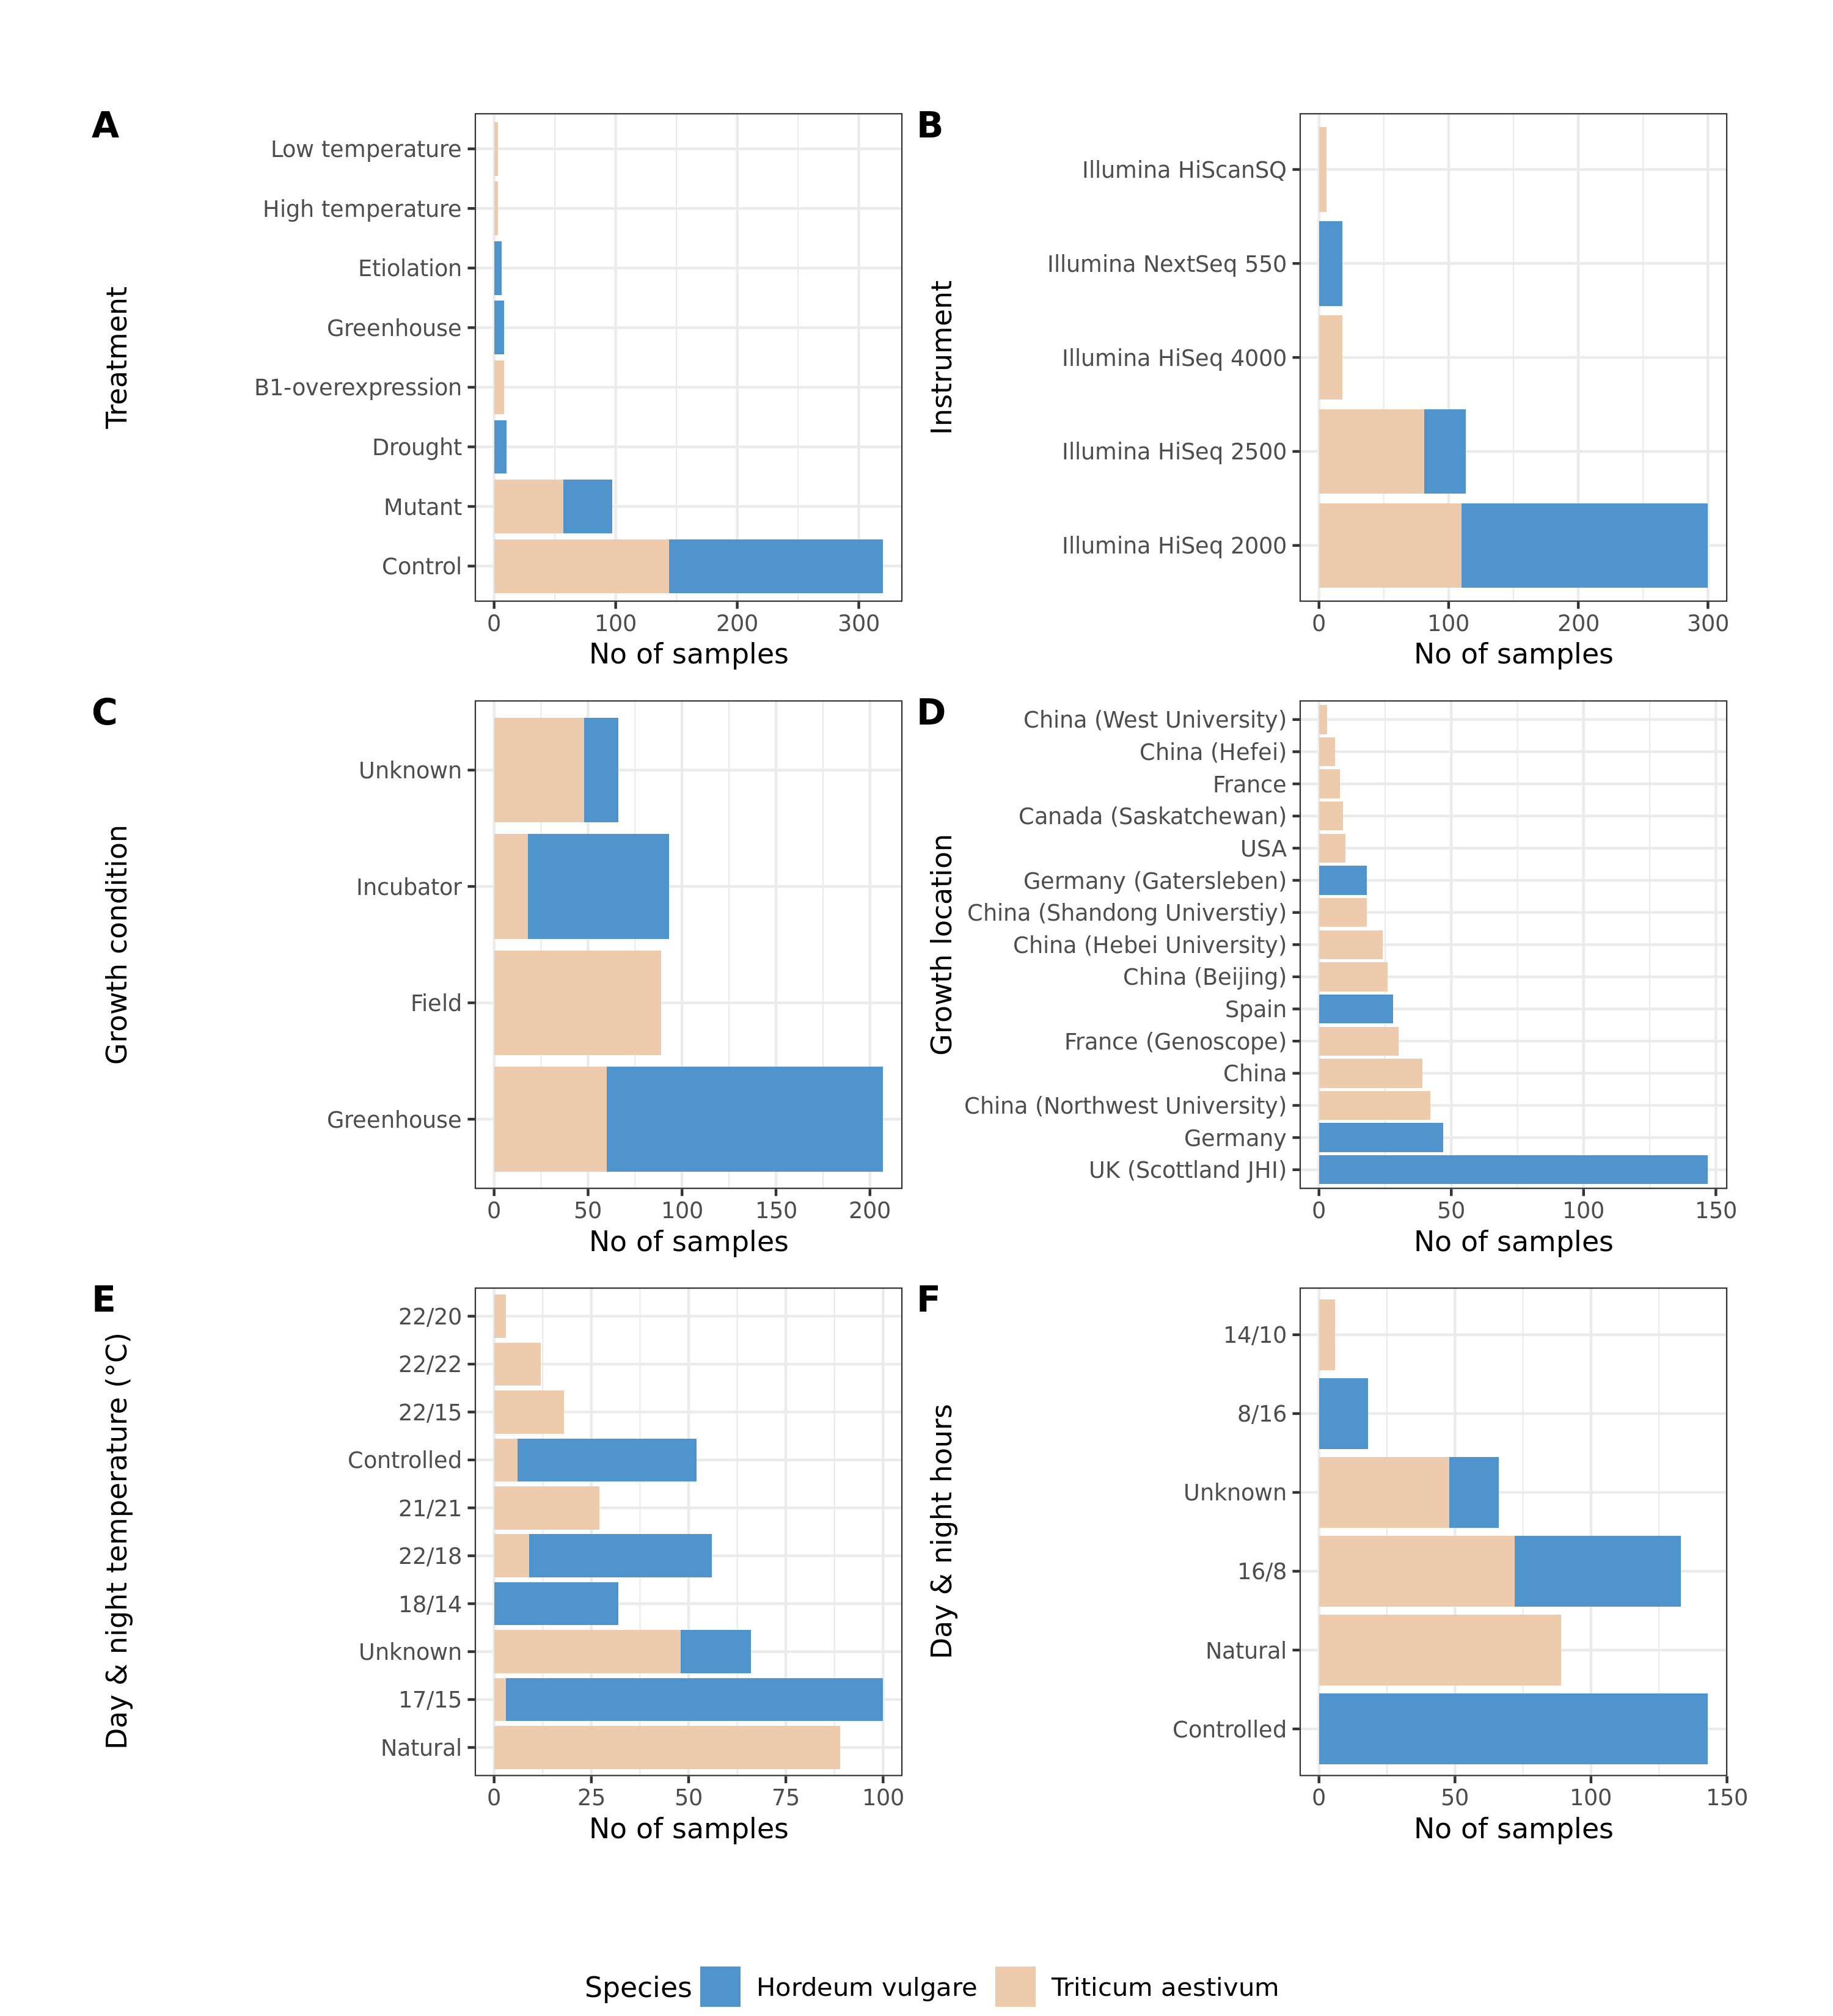

In [9]:
# important tech variables: growth_condition, instrument, treatment
# day_night, temp, growth_location, seq_location
setwd("/home/vanda.marosi/floral_development_thesis_vm/figures/")
options(repr.plot.width = 10, repr.plot.height = 11, repr.plot.res = 300)

shared$treatment <- factor(shared$treatment)
s1 <- shared %>% group_by(organism, treatment) %>% summarise(total = n()) %>% 
        ggplot(aes(x = reorder(treatment, -total), y = total, fill = organism)) + 
        geom_col(position = "stack") + 
        labs(x = "Treatment") +
        labs(y = "No of samples") + 
        scale_x_discrete(labels = c("Control", "Mutant", "Drought", "B1-overexpression", 
                                    "Greenhouse", "Etiolation", "High temperature", "Low temperature")) +
        coord_flip() + 
        scale_fill_manual(values = c("steelblue3", "peachpuff2")) +
        guides(fill=guide_legend(title="Species")) +
        theme(legend.position = "none")
shared$instrument <- factor(shared$instrument)
s2 <- shared %>% group_by(organism, instrument) %>% summarise(total = n()) %>% 
        ggplot(aes(x = reorder(instrument, -total), y = total, fill = organism)) + 
        geom_col(position = "stack") + 
        labs(x = "Instrument") +
        labs(y = "No of samples") + 
        coord_flip() + 
        scale_fill_manual(values = c("steelblue3", "peachpuff2")) +
        guides(fill=guide_legend(title="Species")) +
        theme(legend.position = "none",
              plot.margin = margin(6, 0, 6, 0))
shared$growth_condition <- factor(shared$growth_condition)
s3 <- shared %>% group_by(organism, growth_condition) %>% summarise(total = n()) %>% 
        ggplot(aes(x = reorder(growth_condition, -total), y = total, fill = organism)) + 
        geom_col(position = "stack") + 
        labs(x = "Growth condition") +
        labs(y = "No of samples") + 
        scale_x_discrete(labels = c("Greenhouse", "Field", "Incubator", "Unknown")) +
        coord_flip() + 
        scale_fill_manual(values = c("steelblue3", "peachpuff2")) +
        guides(fill=guide_legend(title="Species")) +
        theme(legend.position = "none",
              plot.margin = margin(6, 0, 6, 0))
shared$day_night <- factor(shared$day_night)
s4 <- shared %>% group_by(organism, day_night) %>% summarise(total = n()) %>% 
        ggplot(aes(x = reorder(day_night, -total), y = total, fill = organism)) + 
        geom_col(position = "stack") + 
        labs(x = "Day & night hours") +
        labs(y = "No of samples") + 
        scale_x_discrete(labels = c("Controlled", "Natural", "16/8", "Unknown", "8/16", "14/10")) +
        coord_flip() + 
        scale_fill_manual(name = "Species", labels = c("Hordeum vulgare    ", "Triticum aestivum"), 
                          values = c("steelblue3", "peachpuff2")) +
        theme(legend.text=element_text(size=10), 
              legend.position = "bottom",
              legend.box = "vertical")
shared$temp <- factor(shared$temp)
s5 <- shared %>% group_by(organism, temp) %>% summarise(total = n()) %>% 
        ggplot(aes(x = reorder(temp, -total), y = total, fill = organism)) + 
        geom_col(position = "stack") + 
        labs(x = "Day & night temperature (°C)  ") +
        labs(y = "No of samples") + 
        scale_x_discrete(labels = c("Natural", "17/15", "Unknown", "18/14", "22/18", "21/21", 
                                    "Controlled", "22/15", "22/22", "22/20")) +
        coord_flip() + 
        scale_fill_manual(values = c("steelblue3", "peachpuff2")) +
        guides(fill=guide_legend(title="Species")) +
        theme(legend.position = "none",
              plot.margin = margin(6, 0, 6, 0))
shared$growth_location <- factor(shared$growth_location)
s6 <- shared %>% group_by(organism, growth_location) %>% summarise(total = n()) %>% 
        ggplot(aes(x = reorder(growth_location, -total), y = total, fill = organism)) + 
        geom_col(position = "stack") + 
        labs(x = "Growth location") +
        labs(y = "No of samples") + 
        scale_x_discrete(labels = c("UK (Scottland JHI)", "Germany", "China (Northwest University)", 
                                    "China", "France (Genoscope)", "Spain", "China (Beijing)", 
                                    "China (Hebei University)", "China (Shandong Universtiy)", 
                                    "Germany (Gatersleben)", "USA", "Canada (Saskatchewan)", "France", 
                                    "China (Hefei)", "China (West University)")) +
        coord_flip() + 
        scale_fill_manual(values = c("steelblue3", "peachpuff2")) +
        guides(fill=guide_legend(title="Species")) +
        theme(legend.position = "none")
shared$seq_location <- factor(shared$seq_location)
s7 <- shared %>% group_by(organism, seq_location) %>% summarise(total = n()) %>% 
        ggplot(aes(x = reorder(seq_location, -total), y = total, fill = organism)) + 
        geom_col(position = "stack") + 
        labs(x = "Sequencing location") +
        labs(y = "No of samples") + 
        coord_flip() + 
        scale_fill_manual(values = c("steelblue3", "peachpuff2")) +
        guides(fill=guide_legend(title="Species")) +
        theme(legend.position = "none")

sup1 <- plot_grid(s1, s2, s3, s6, s5, s4 + theme(legend.position="none"), 
                  labels = c( "A", "B", "C", "D", "E", "F"), 
                  align = 'vh', hjust = 0, nrow = 3)
legend <- get_legend(s4 + guides(color = guide_legend(nrow = 1)) + theme(legend.position = "bottom"))
sup01 <- plot_grid(sup1, legend, nrow = 2, rel_heights = c(1, .03), scale = 0.9)
sup01
ggsave("sup1_meta.pdf", plot = sup01, width = 10, height = 11)
#                  rel_widths = c(1, 0.05, 1), 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'RNA input (μg)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'RNA input (μg)' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'RNA input (μg)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'RNA input (μg)' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'RNA input (μg)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'RNA input (μg)' in 'mbcsToSbcs': dot substituted for <bc>”Warning message 

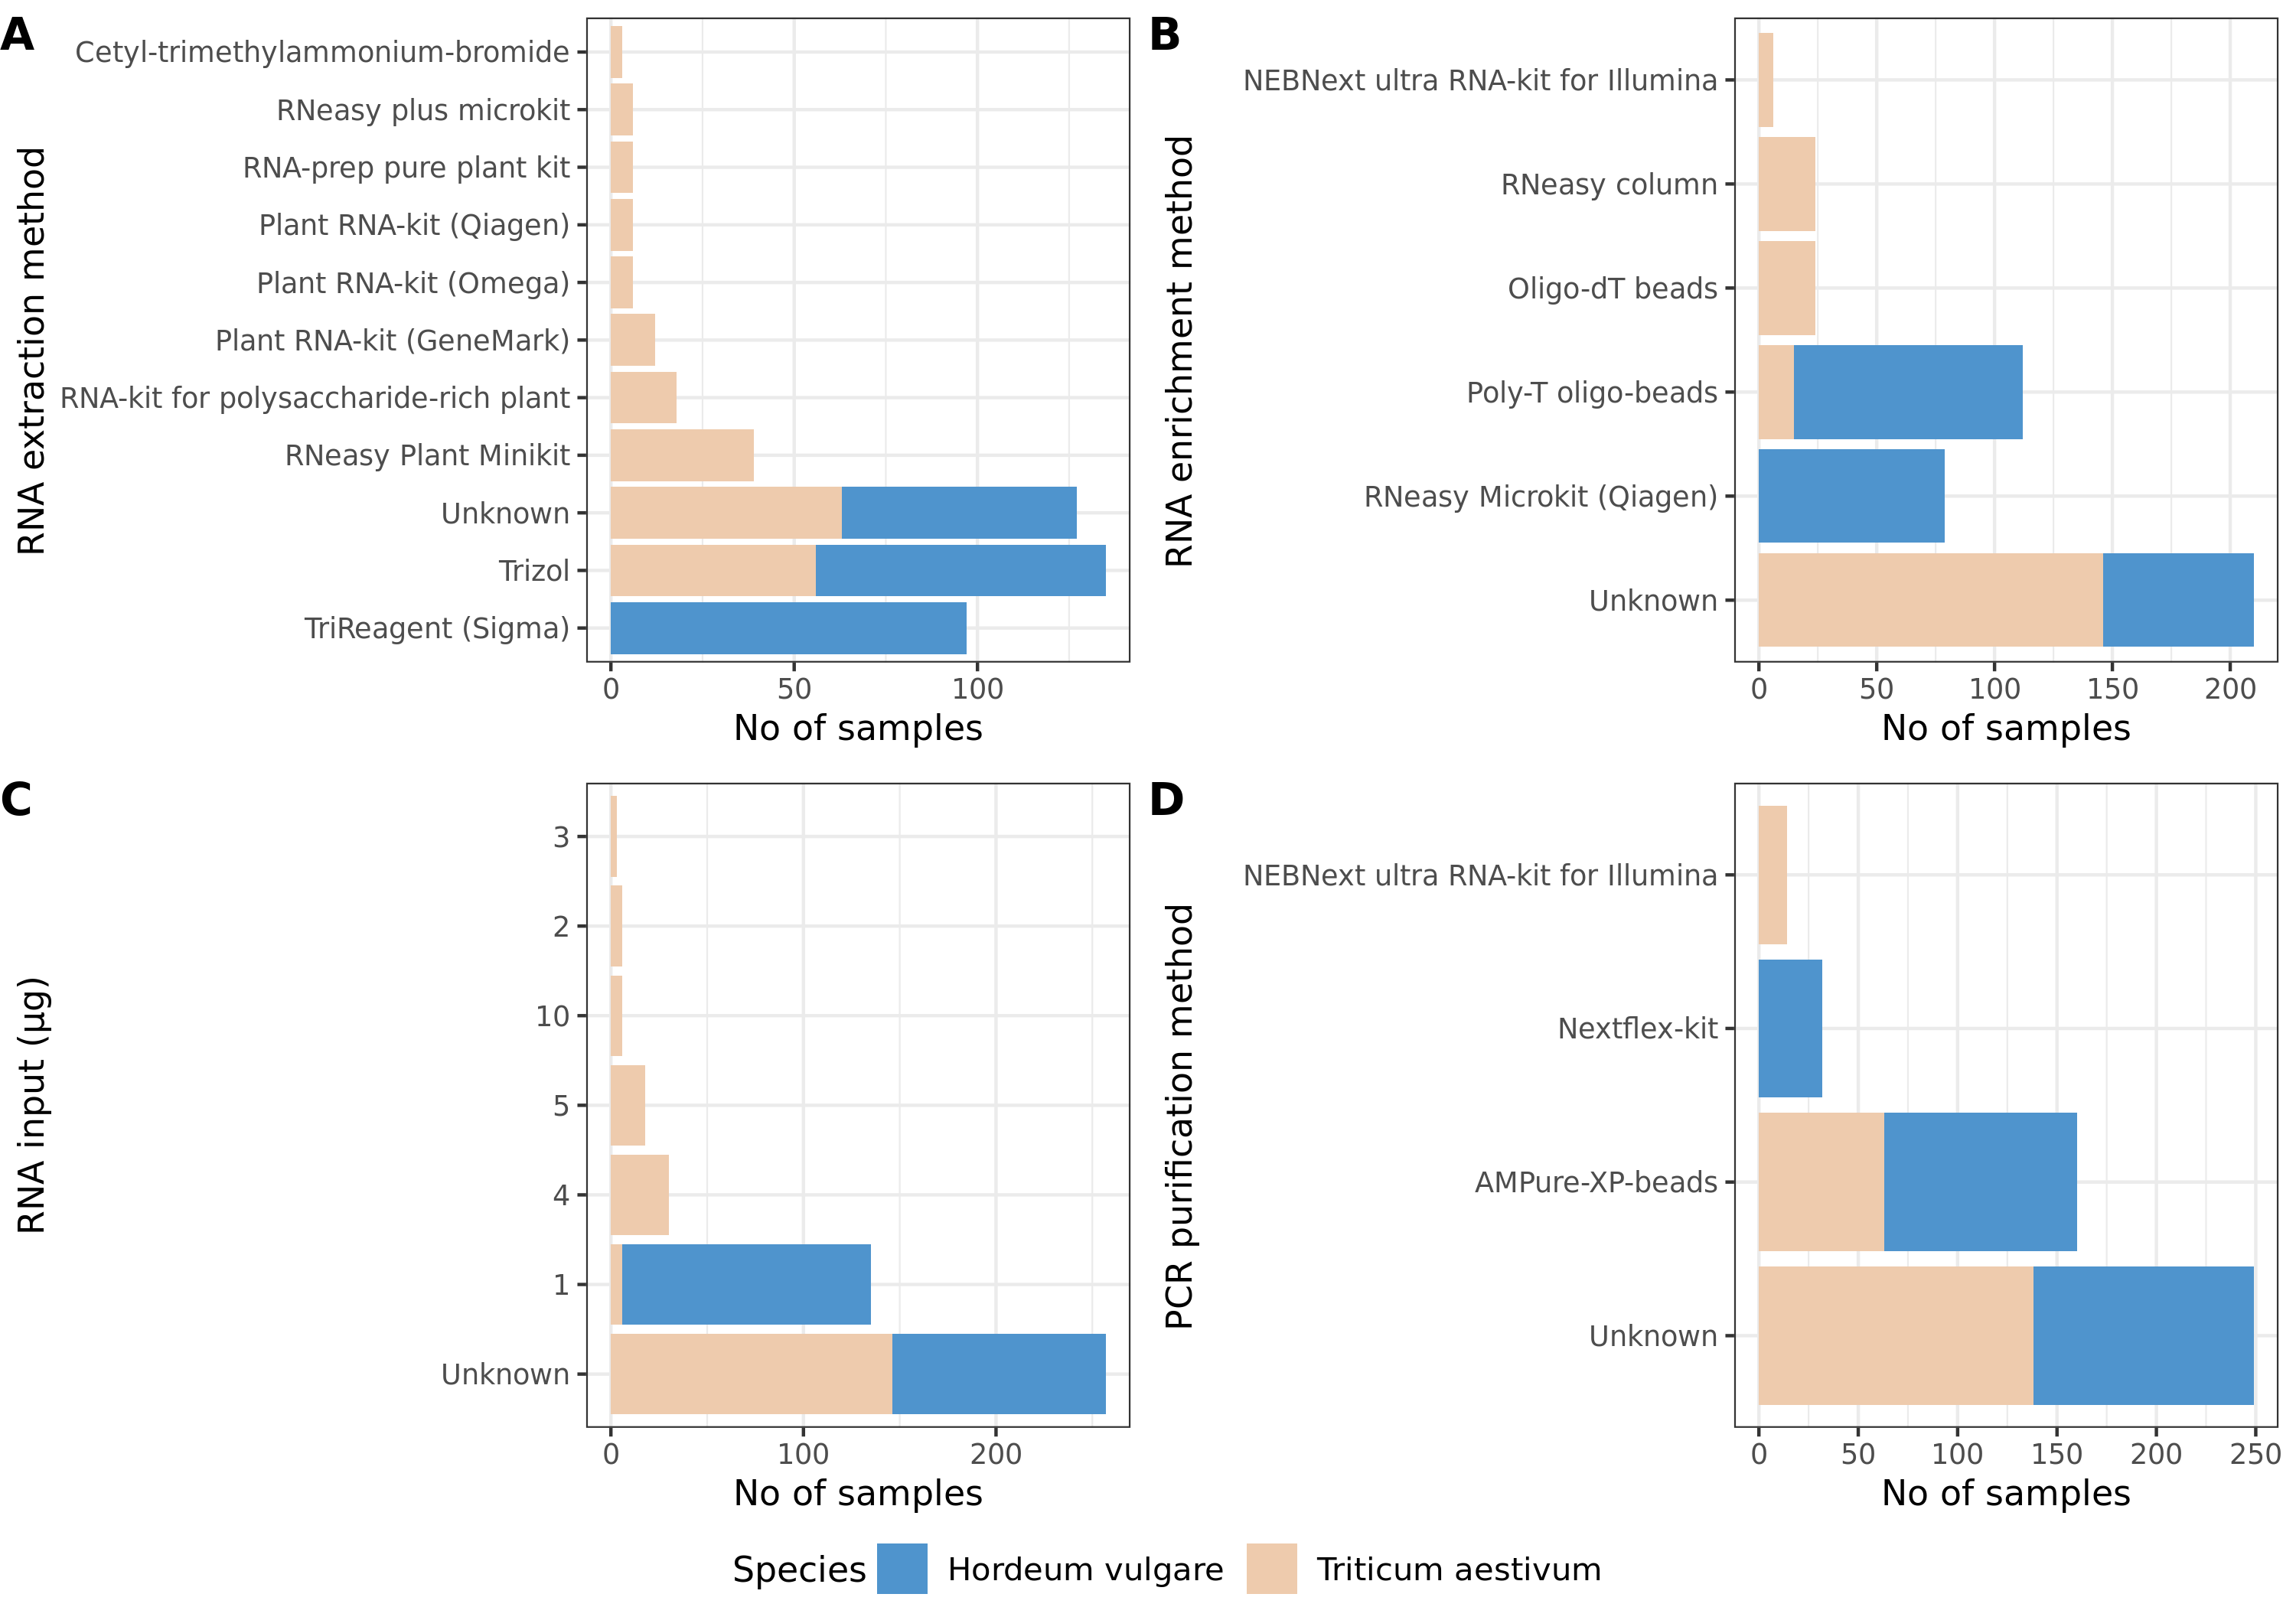

In [10]:
# rna_extraction, rna_enrichment, rna_input, pcr_purification, 
setwd("/home/vanda.marosi/floral_development_thesis_vm/figures/")
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 300)
shared$rna_extraction <- factor(shared$rna_extraction)
r1 <- shared %>% group_by(organism, rna_extraction) %>% summarise(total = n()) %>% 
        ggplot(aes(x = reorder(rna_extraction, -total), y = total, fill = organism)) + 
        geom_col(position = "stack") + 
        labs(x = "RNA extraction method  ") +
        labs(y = "No of samples") + 
        scale_x_discrete(labels = c("TriReagent (Sigma)", "Trizol", "Unknown", "RNeasy Plant Minikit", 
                                    "RNA-kit for polysaccharide-rich plant", "Plant RNA-kit (GeneMark)", 
                                    "Plant RNA-kit (Omega)", "Plant RNA-kit (Qiagen)", "RNA-prep pure plant kit", 
                                    "RNeasy plus microkit", "Cetyl-trimethylammonium-bromide")) +
        coord_flip() + 
        scale_fill_manual(values = c("steelblue3", "peachpuff2")) +
        guides(fill=guide_legend(title="Species")) +
        theme(legend.position = "none")
shared$rna_enrichment <- factor(shared$rna_enrichment)
r2 <- shared %>% group_by(organism, rna_enrichment) %>% summarise(total = n()) %>% 
        ggplot(aes(x = reorder(rna_enrichment, -total), y = total, fill = organism)) + 
        geom_col(position = "stack") + 
        labs(x = "RNA enrichment method  ") +
        labs(y = "No of samples") + 
        scale_x_discrete(labels = c("Unknown", "RNeasy Microkit (Qiagen)", "Poly-T oligo-beads", "Oligo-dT beads", 
                                    "RNeasy column", "NEBNext ultra RNA-kit for Illumina")) +
        coord_flip() + 
        scale_fill_manual(values = c("steelblue3", "peachpuff2")) +
        guides(fill=guide_legend(title="Species")) +
        theme(legend.position = "none")
shared$rna_input <- factor(shared$rna_input)
r3 <- shared %>% group_by(organism, rna_input) %>% summarise(total = n()) %>% 
        ggplot(aes(x = reorder(rna_input, -total), y = total, fill = organism)) + 
        geom_col(position = "stack") + 
        labs(x = "RNA input (μg)") +
        labs(y = "No of samples") + 
        scale_x_discrete(labels = c("Unknown", "1", "4", "5", "10", "2", "3")) +
        coord_flip() + 
        scale_fill_manual(values = c("steelblue3", "peachpuff2")) +
        guides(fill=guide_legend(title="Species")) +
        theme(legend.position = "none")
shared$pcr_purification <- factor(shared$pcr_purification)
r4 <- shared %>% group_by(organism, pcr_purification) %>% summarise(total = n()) %>% 
        ggplot(aes(x = reorder(pcr_purification, -total), y = total, fill = organism)) + 
        geom_col(position = "stack") + 
        labs(x = "PCR purification method  ") +
        labs(y = "No of samples") + 
        scale_x_discrete(labels = c("Unknown", "AMPure-XP-beads", "Nextflex-kit", 
                                    "NEBNext ultra RNA-kit for Illumina")) +
        coord_flip() + 
        scale_fill_manual(labels = c("Hordeum vulgare    ", "Triticum aestivum"), 
                          values = c("steelblue3", "peachpuff2")) +
        guides(fill=guide_legend(title="Species")) +
        theme(legend.text=element_text(size=10),
              legend.position = "bottom")
sup2 <- plot_grid(r1, r2, r3, r4 + theme(legend.position="none"), 
                  labels = c( "A", "B", "C", "D"), align = 'vh', hjust = 0, nrow = 2)
legend <- get_legend(r4 + guides(color = guide_legend(nrow = 1)) + theme(legend.position = "top"))
sup02 <- plot_grid(sup2, legend, ncol = 1, rel_heights = c(1, .05))
sup02
ggsave("sup2_meta.pdf", plot = sup02, width = 10, height = 7)

# 2. Mosaic figures

In [11]:
mosaic <- select(shared, organism, zadoc_scale, intermediate_age, high_level_age, intermediate_tissue, high_level_tissue)
colnames(mosaic) <- c("Species", "Zadok_scale", "Intermediate_age", "High_level_age", "Intermediate_tissue", "High_level_tissue")
glimpse(mosaic)

Rows: 455
Columns: 6
$ Species             <chr> "Hordeum vulgare", "Hordeum vulgare", "Hordeum vu…
$ Zadok_scale         <fct> 9, 9, 9, 11, 11, 11, 11, 11, 11, 14, 14, 14, 14, …
$ Intermediate_age    <fct> Germination, Germination, Germination, Leaf_devel…
$ High_level_age      <fct> Seedling, Seedling, Seedling, Vegetative, Vegetat…
$ Intermediate_tissue <fct> apex, apex, apex, apex, apex, apex, apex, apex, a…
$ High_level_tissue   <fct> meristem, meristem, meristem, meristem, meristem,…


In [12]:
setwd("/home/vanda.marosi//floral_development_thesis_vm/datatables")
write.table(mosaic, file = "mosaic_table.csv", sep = ",", col.names = TRUE)

png 
  2

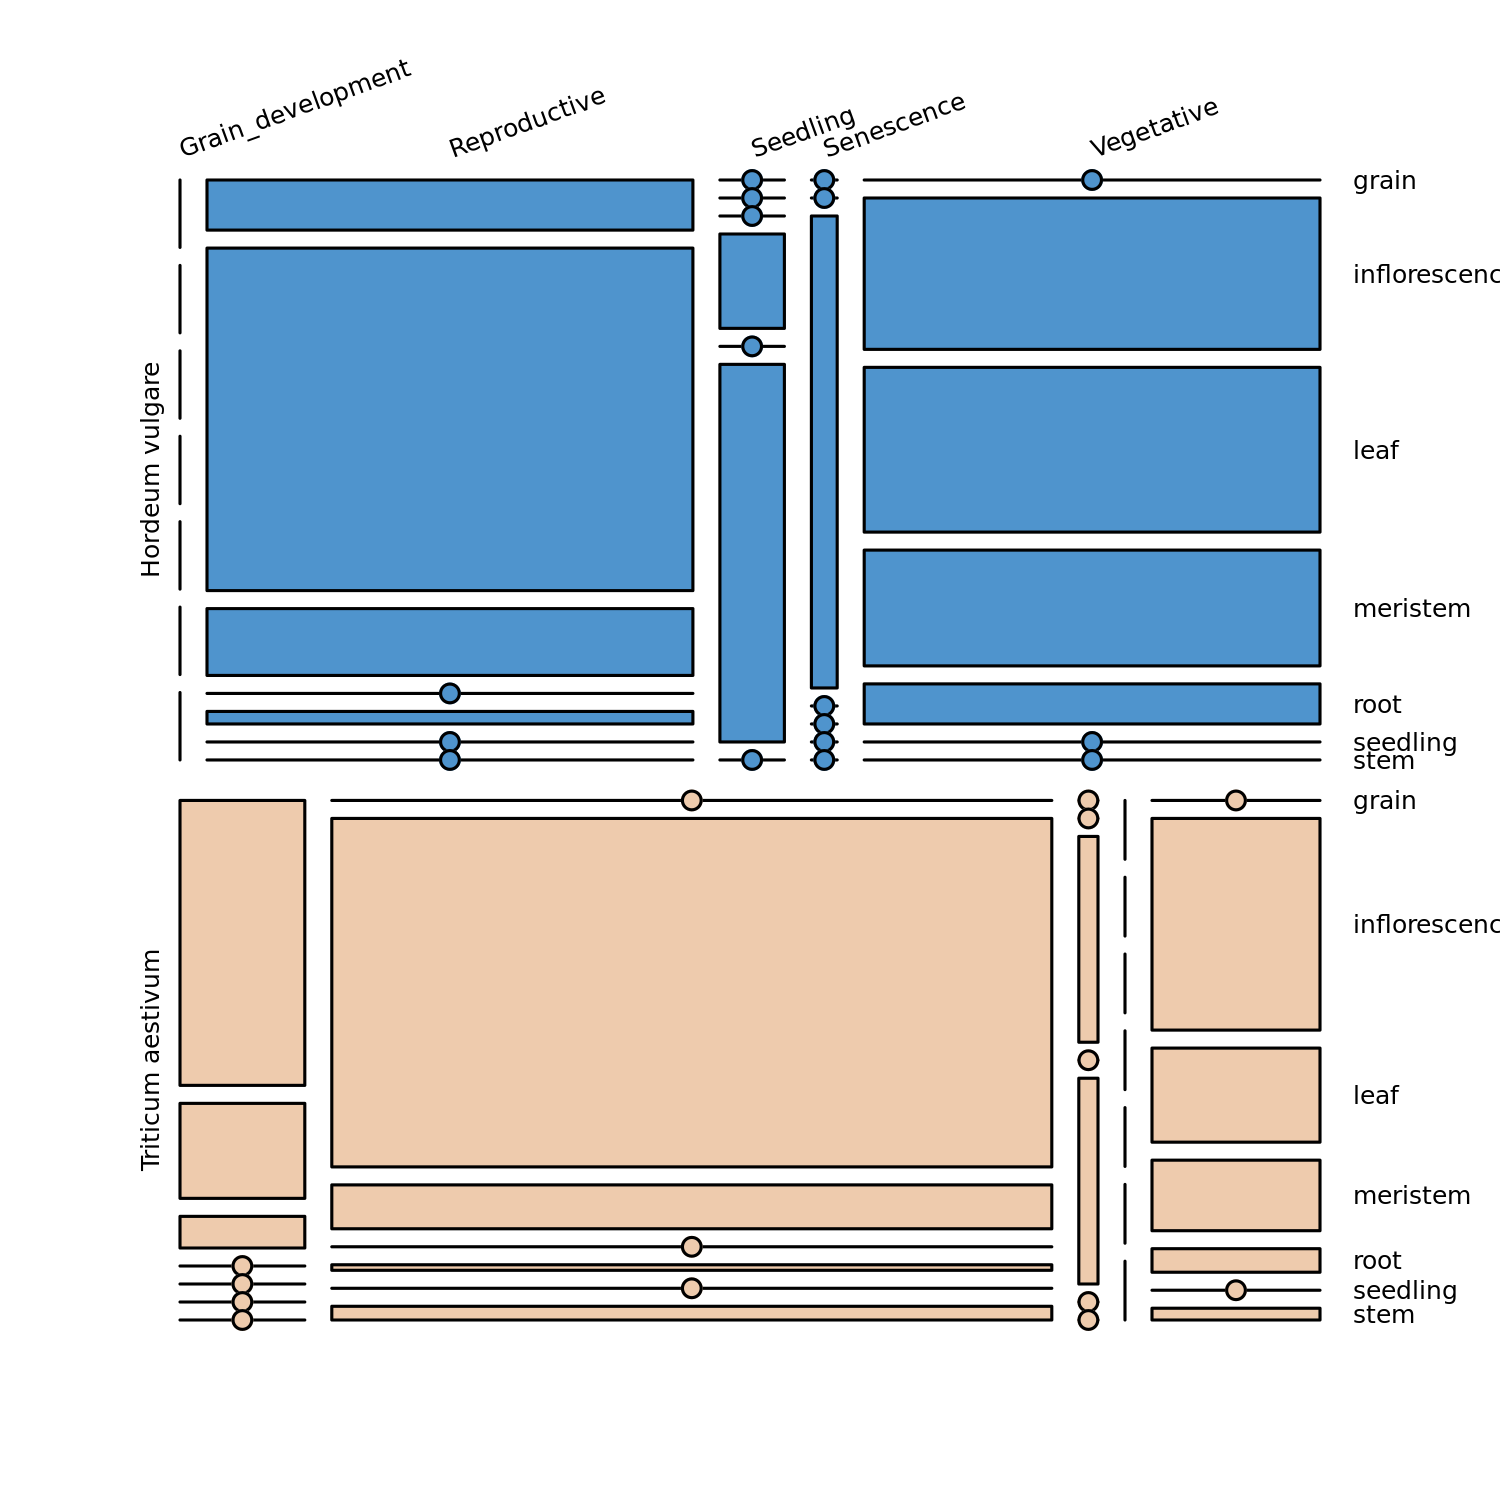

png 
  2

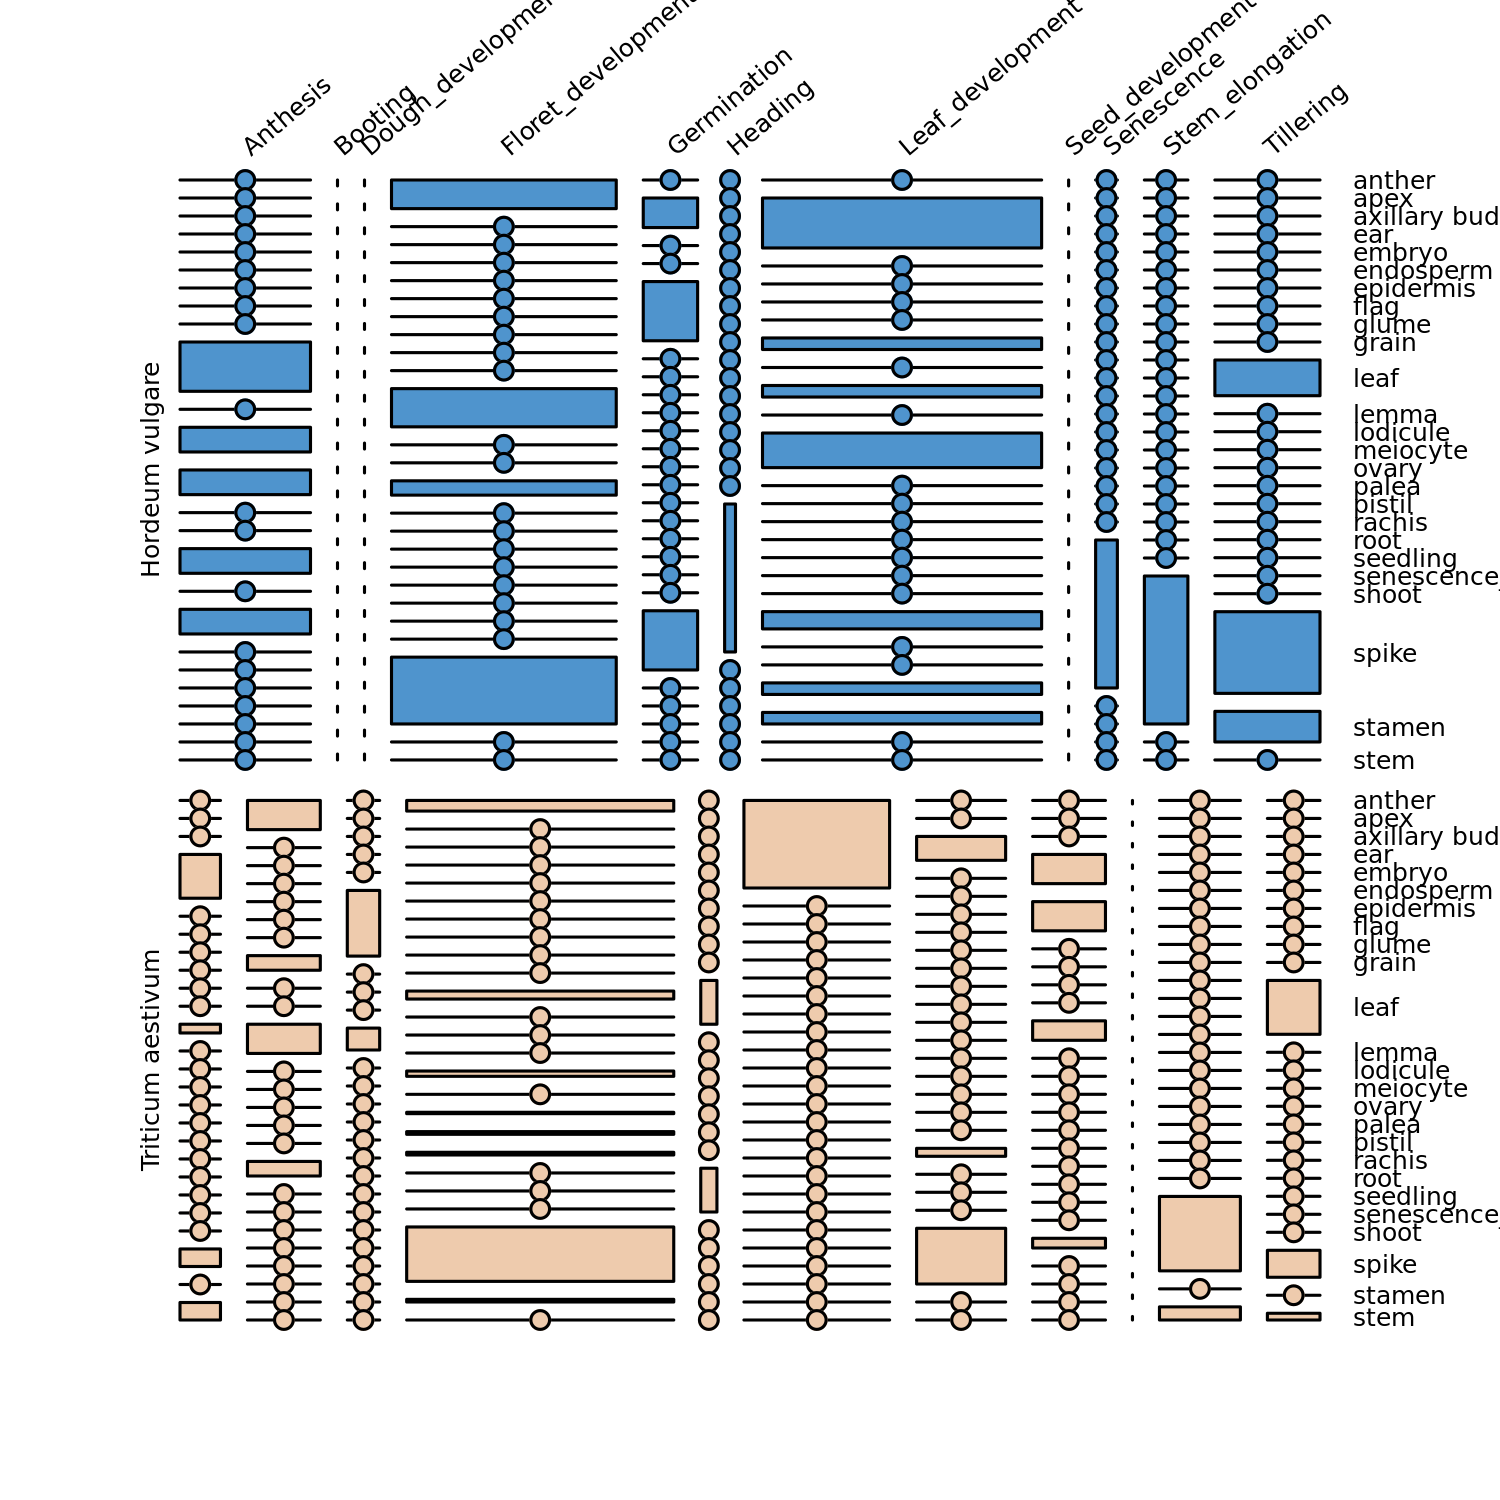

png 
  2

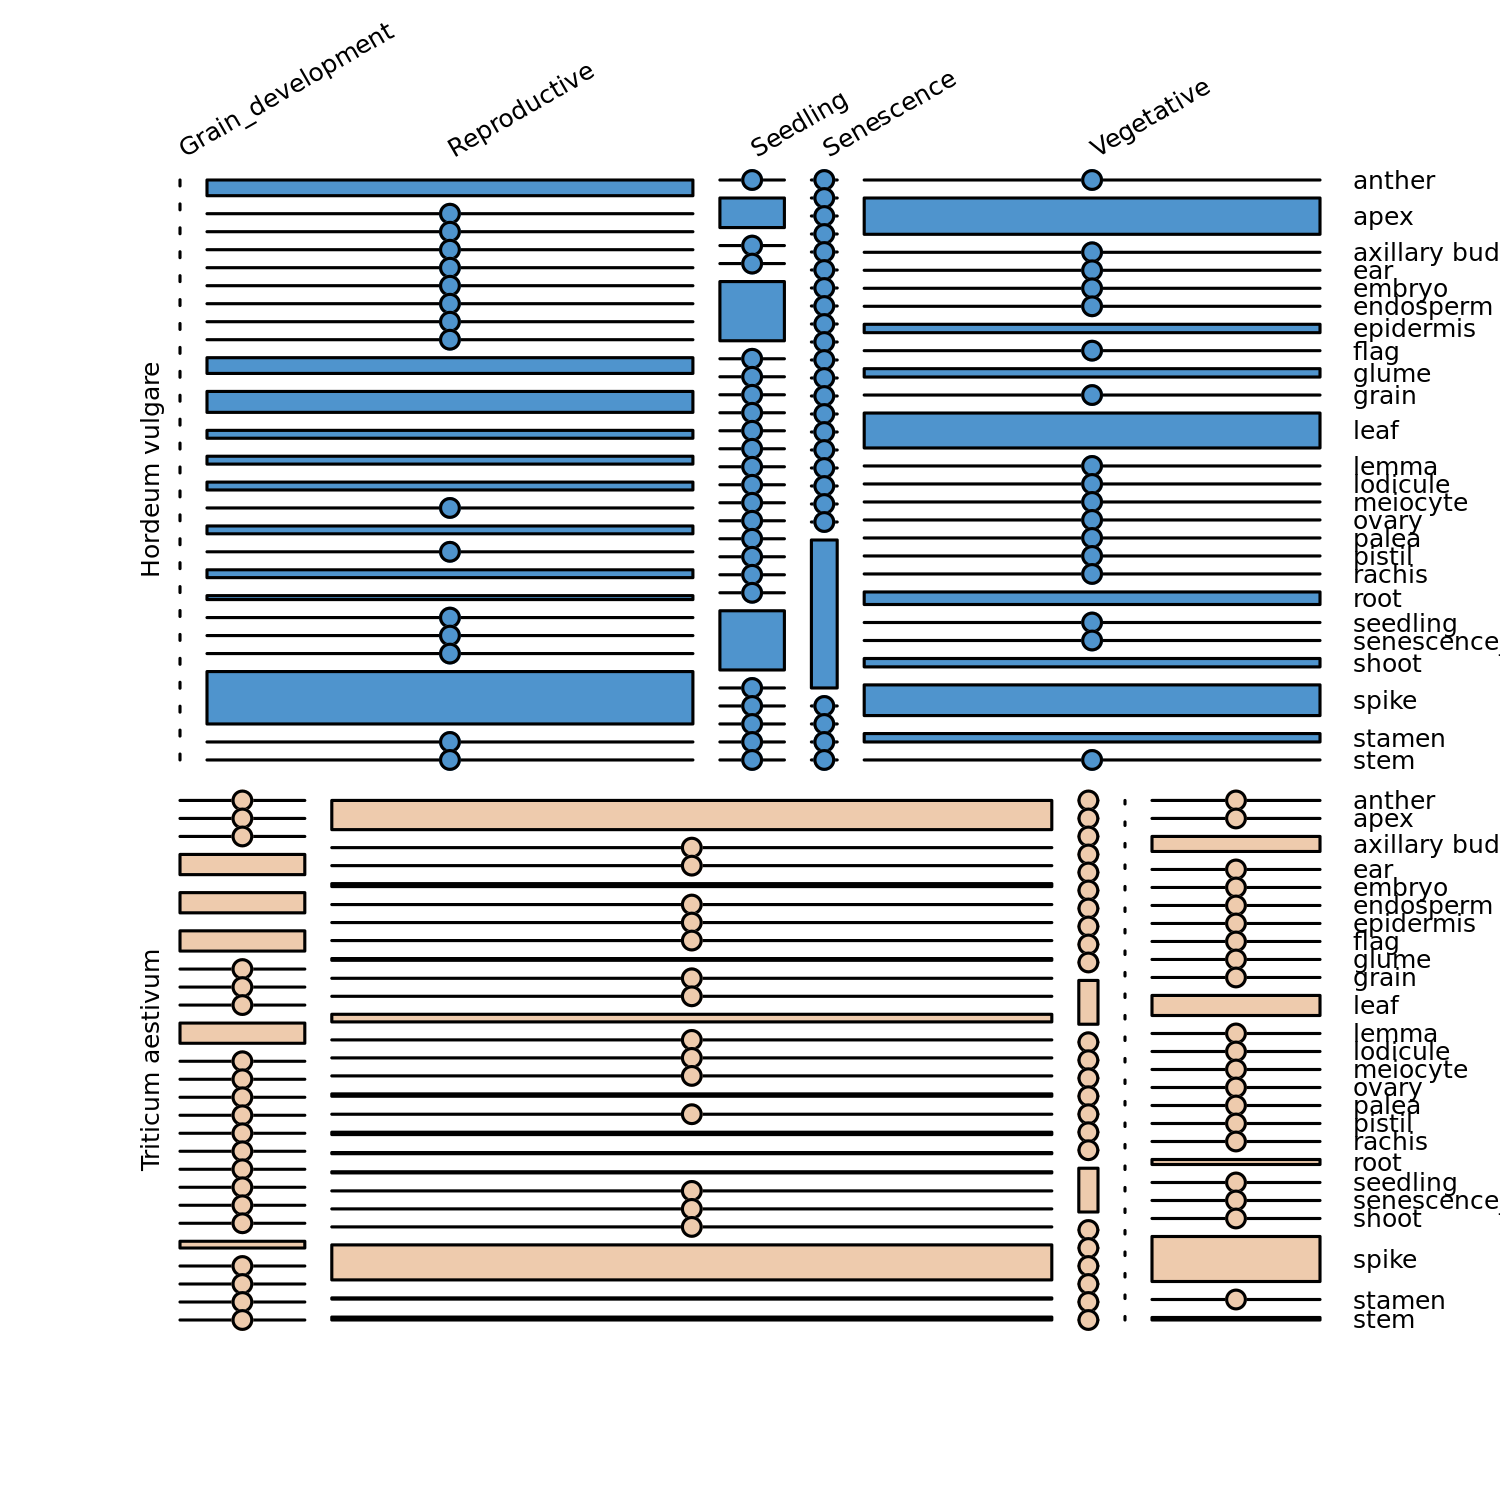

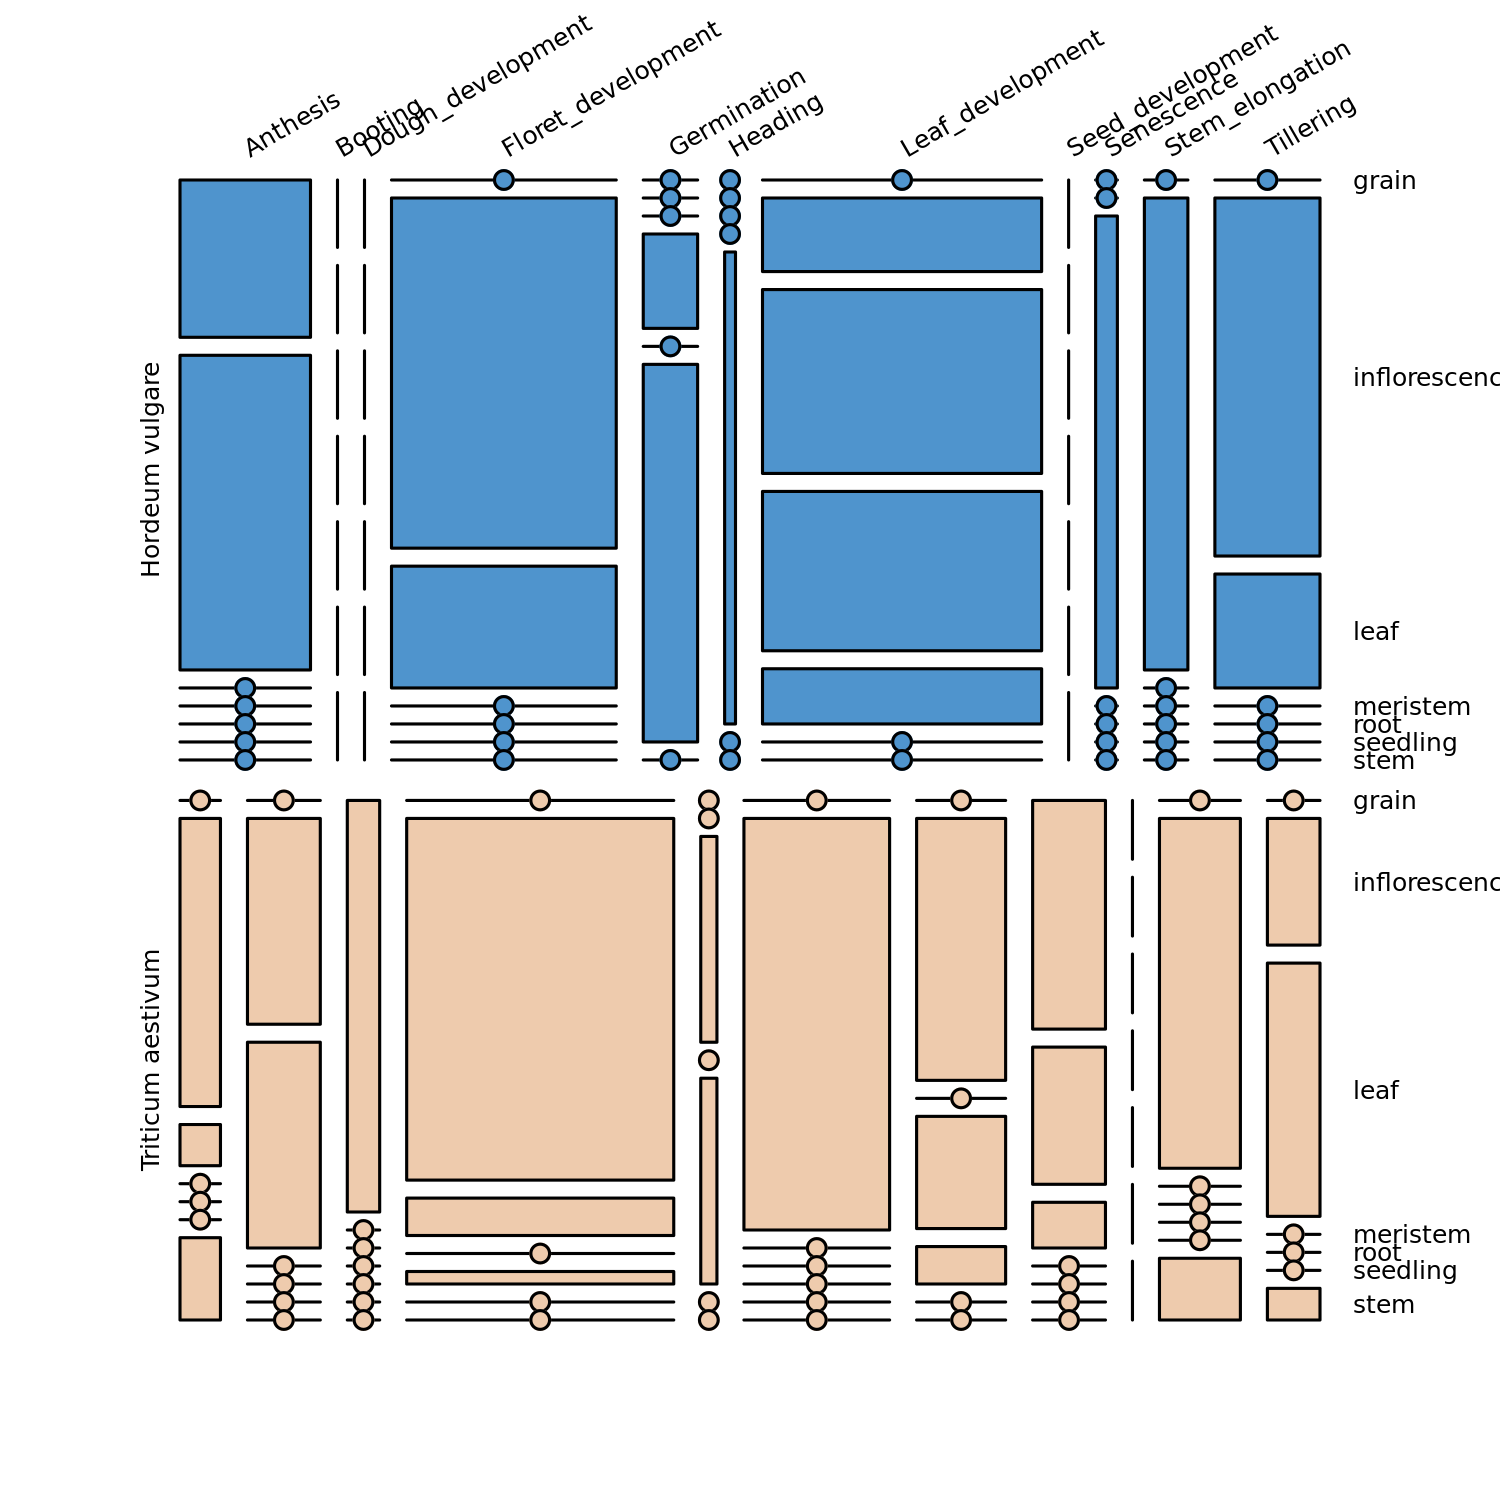

In [13]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 300)
setwd("/home/vanda.marosi/floral_development_thesis_vm/figures/")
# extra options to customize: 
# add colouring -  not possible individually! order of cells is not logical
mosaic(~ Species + High_level_age + High_level_tissue, data = mosaic, shade = TRUE,
         gp = gpar(fill = c("steelblue3", "peachpuff2"), col = 1),
       labeling= labeling_border(gp_labels = gpar(fontsize = 6),
                                 gp_varnames = gpar(fontsize = 0),
                                 rot_labels = c(20,0,0,90), 
                                 just_labels = c("left", 
                                                 "left", 
                                                 "center", 
                                                 "center")))
# to save as svg
svg("mosaic1.svg")
mosaic(~ Species + High_level_age + High_level_tissue, data = mosaic, shade = TRUE,
         gp = gpar(fill = c("steelblue3", "peachpuff2"), col = 1),
       labeling= labeling_border(gp_labels = gpar(fontsize = 6),
                                 gp_varnames = gpar(fontsize = 0),
                                 rot_labels = c(20,0,0,90), 
                                 just_labels = c("left", 
                                                 "left", 
                                                 "center", 
                                                 "center")))
dev.off() 

mosaic(~ Species + Intermediate_age + Intermediate_tissue, data = mosaic, 
        gp = gpar(fill = c("steelblue3", "peachpuff2"), col = 1),
       labeling= labeling_border(gp_labels = gpar(fontsize = 6),
                                 gp_varnames = gpar(fontsize = 0),
                                 rot_labels = c(40,0,0,90), 
                                 just_labels = c("left", 
                                                 "left", 
                                                 "center", 
                                                 "center")))
# to save as svg
svg("mosaic2.svg")
mosaic(~ Species + Intermediate_age + Intermediate_tissue, data = mosaic, 
        gp = gpar(fill = c("steelblue3", "peachpuff2"), col = 1),
       labeling= labeling_border(gp_labels = gpar(fontsize = 6),
                                 gp_varnames = gpar(fontsize = 0),
                                 rot_labels = c(40,0,0,90), 
                                 just_labels = c("left", 
                                                 "left", 
                                                 "center", 
                                                 "center")))
dev.off() 

mosaic(~ Species + High_level_age + Intermediate_tissue, data = mosaic, 
        gp = gpar(fill = c("steelblue3", "peachpuff2"), col = 1),
       labeling= labeling_border(gp_labels = gpar(fontsize = 6),
                                 gp_varnames = gpar(fontsize = 0),
                                 rot_labels = c(30,0,0,90), 
                                 just_labels = c("left", 
                                                 "left", 
                                                 "center", 
                                                 "center")))

svg("mosaic3.svg")
mosaic(~ Species + High_level_age + Intermediate_tissue, data = mosaic, 
        gp = gpar(fill = c("steelblue3", "peachpuff2"), col = 1),
       labeling= labeling_border(gp_labels = gpar(fontsize = 6),
                                 gp_varnames = gpar(fontsize = 0),
                                 rot_labels = c(30,0,0,90), 
                                 just_labels = c("left", 
                                                 "left", 
                                                 "center", 
                                                 "center")))
dev.off() 


mosaic(~ Species + Intermediate_age + High_level_tissue, data = mosaic, 
        gp = gpar(fill = c("steelblue3", "peachpuff2"), col = 1),
       labeling= labeling_border(gp_labels = gpar(fontsize = 6),
                                 gp_varnames = gpar(fontsize = 0),
                                 rot_labels = c(30,0,0,90), 
                                 just_labels = c("left", 
                                                 "left", 
                                                 "center", 
                                                 "center")))

# Contrast options for comparative analysis:

* if we group the tissues into organs (High-level tissue) and use the largest grouping of the developmental phase (High-level age):
    - **grain:** Reproductive (Seed development)
    - **inflorescence:** Reproductive (Anthesis, Booting, Heading)
    - **leaf:** Reproductive, Seedling, Vegetative (Booting, Leaf development, Tillering)
    - **root:** Seedling (Leaf development)
* if we look at tissues and lowest level grouping for developmental phase (Intermediate age):
    - **anther:** Heading
    - **spike:** Booting, Heading
    - **root:** Leaf development
    - **leaf:** Tillering, Leaf development

# 3. Pheatmap with Pearson correlation (failed)

In [14]:
heat <- select(shared, intermediate_tissue, organism)
heat$organism <- as.factor(heat$organism)
heat$intermediate_tissue <- as.factor(heat$intermediate_tissue)
glimpse(heat)

Rows: 455
Columns: 2
$ intermediate_tissue <fct> apex, apex, apex, apex, apex, apex, apex, apex, a…
$ organism            <fct> Hordeum vulgare, Hordeum vulgare, Hordeum vulgare…


In [15]:
t <- select(shared, organism, high_level_tissue)
t$organism <- as.factor(t$organism)
t$high_level_tissue <- as.factor(t$high_level_tissue)
glimpse(t)
t = table(t)

Rows: 455
Columns: 2
$ organism          <fct> Hordeum vulgare, Hordeum vulgare, Hordeum vulgare, …
$ high_level_tissue <fct> meristem, meristem, meristem, meristem, meristem, m…


In [16]:
h = table(heat)

                   organism
intermediate_tissue Hordeum vulgare Triticum aestivum
       anther                    12                50
       apex                      29                 0
       axillary bud               0                 6
       ear                        0                11
       embryo                     6                 6
       endosperm                  0                 6

Warning message in chisq.test(M):
“Chi-squared approximation may be incorrect”

                   organism
intermediate_tissue Hordeum vulgare Triticum aestivum
    anther               -3.6202932         3.8249885
    apex                  3.5036938        -3.7017964
    axillary bud         -1.7789984         1.8795849
    ear                  -2.4087752         2.5449699
    embryo               -0.1310356         0.1384445
    endosperm            -1.7789984         1.8795849
    epidermis             1.5936860        -1.6837948
    flag                 -1.2579418         1.3290672
    glume                 1.5936860        -1.6837948
    grain                 0.8131249        -0.8590999
    leaf                  1.2463905        -1.3168627
    lemma                 1.5936860        -1.6837948
    lodicule              1.5936860        -1.6837948
    meiocyte              1.5936860        -1.6837948
    ovary                -1.4525461         1.5346746
    palea                 1.5936860        -1.6837948
    pistil               -1.4525461         1.5346746


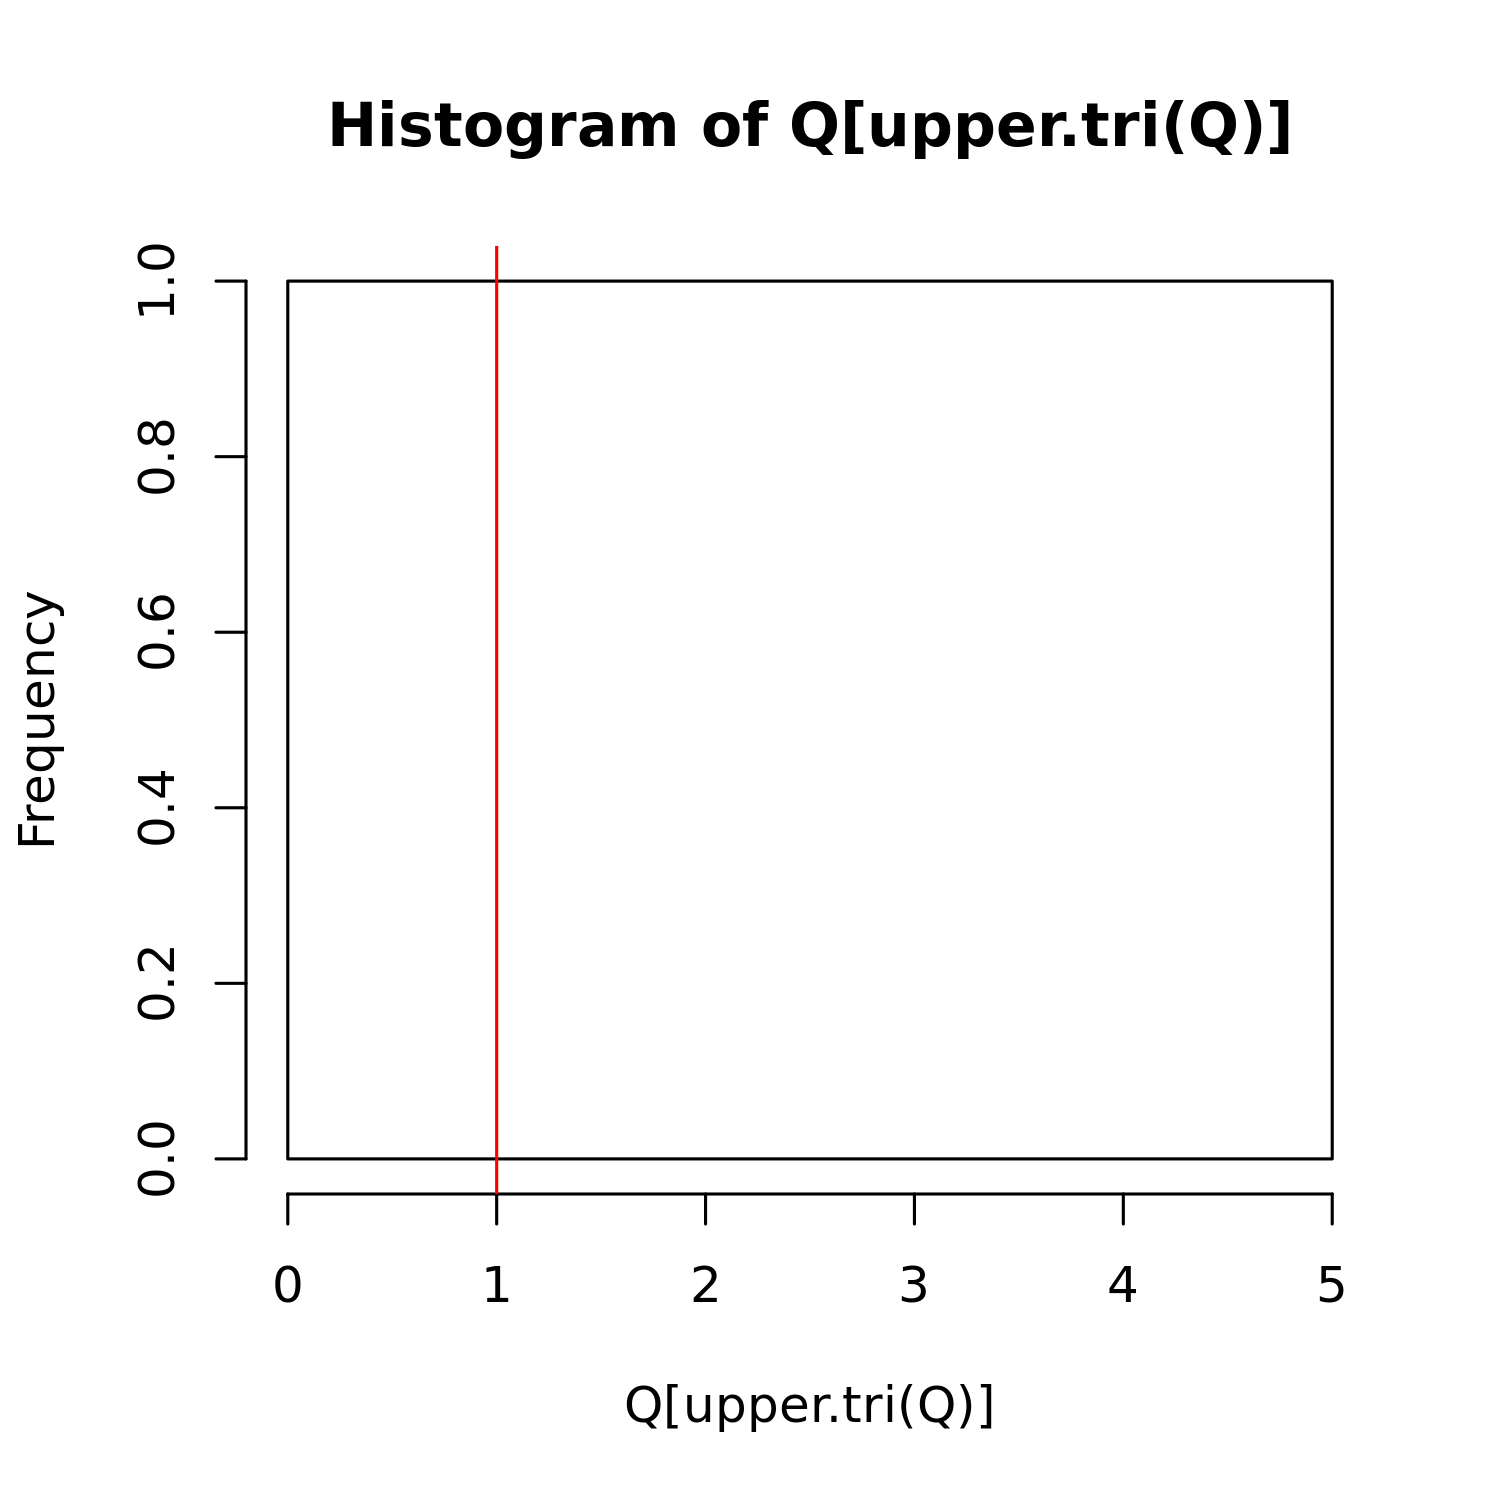

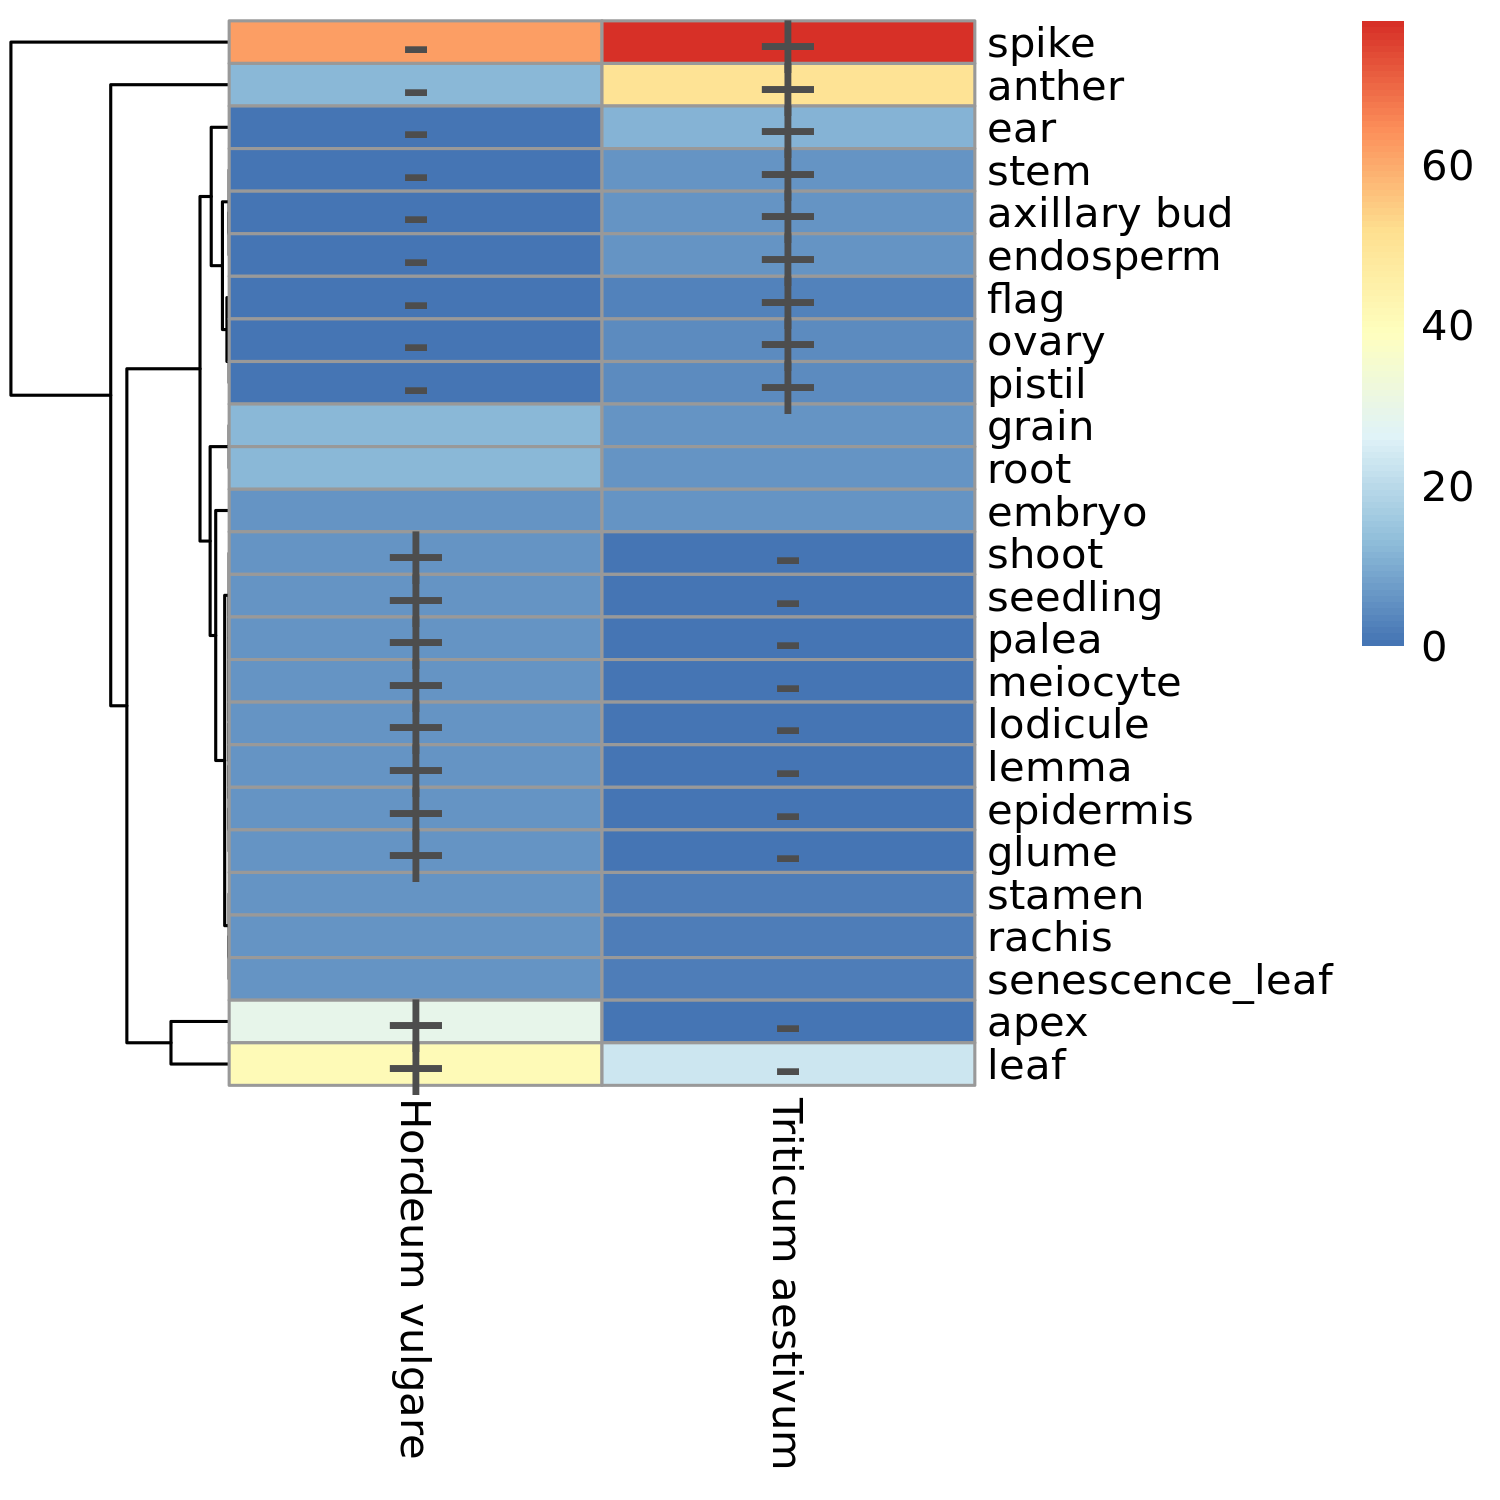

In [17]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 300)

M=as.matrix(h)
#M=M[t$tip.label,t$tip.label]
head(M)
Q=residuals(chisq.test(M),type="pearson")
print(Q)
#diag(M)=NA #a[,1] #Extract or replace the diagonal of a matrix, or construct a diagonal matrix.
cutoff=1
QQ=ifelse(Q>0, ifelse(abs(Q)>cutoff,"+",""),ifelse(abs(Q)>cutoff,"-",""))
#diag(QQ)=""
hist(Q[upper.tri(Q)],breaks = 30)
abline(v=cutoff,col="red")
pheatmap(mat=M,scale="none",
         cluster_rows=TRUE,
         cluster_cols=FALSE,
         display_numbers=QQ,
         fontsize_number=20
        )

                   high_level_tissue
organism            grain inflorescence leaf meristem root seedling stem
  Hordeum vulgare      12           116   59       29   12       12    0
  Triticum aestivum    18           151   28        6    6        0    6

Warning message in chisq.test(M):
“Chi-squared approximation may be incorrect”

                   high_level_tissue
organism                 grain inflorescence       leaf   meristem       root
  Hordeum vulgare   -0.9613406    -2.0927218  1.9352608  2.4526934  0.8131249
  Triticum aestivum  1.0156959     2.2110465 -2.0446826 -2.5913714 -0.8590999
                   high_level_tissue
organism              seedling       stem
  Hordeum vulgare    2.2538124 -1.7789984
  Triticum aestivum -2.3812454  1.8795849


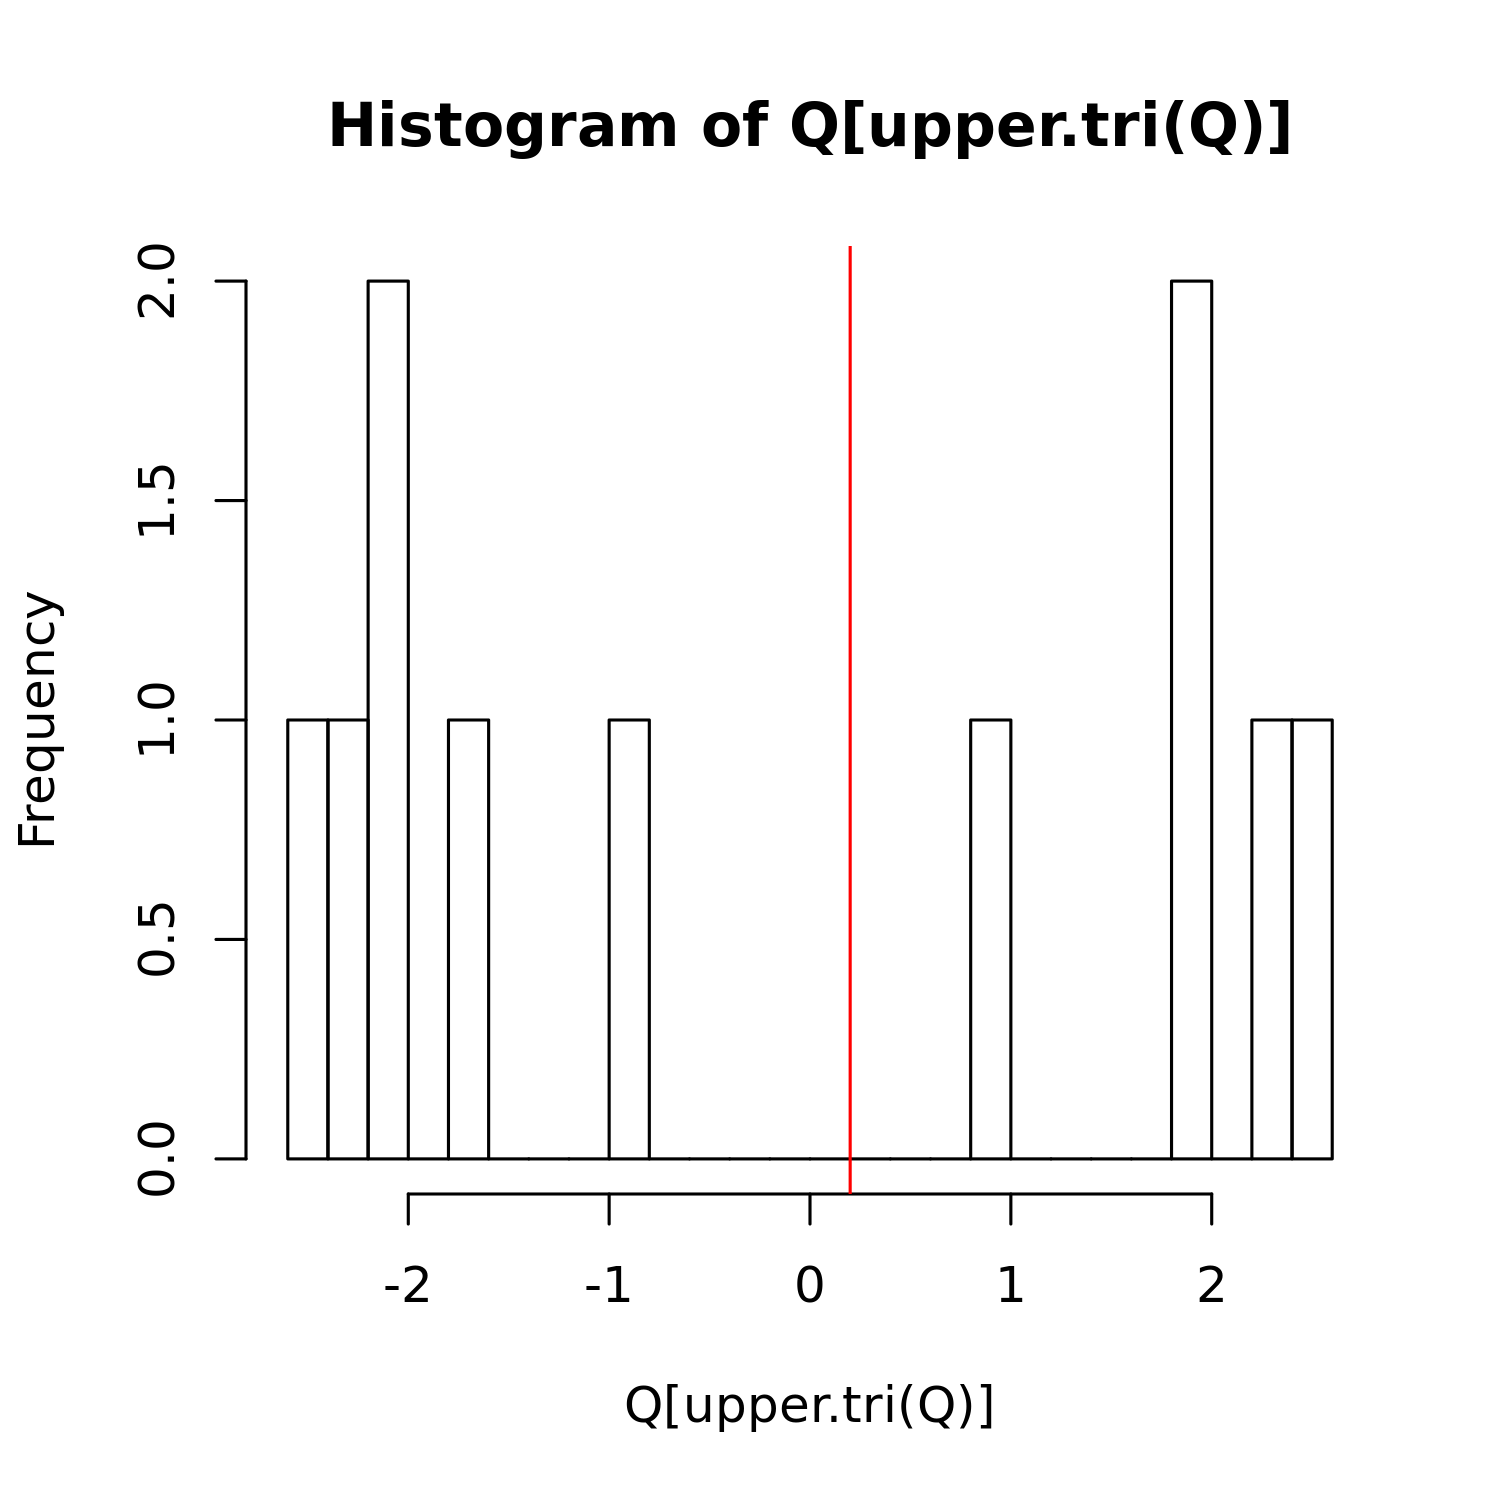

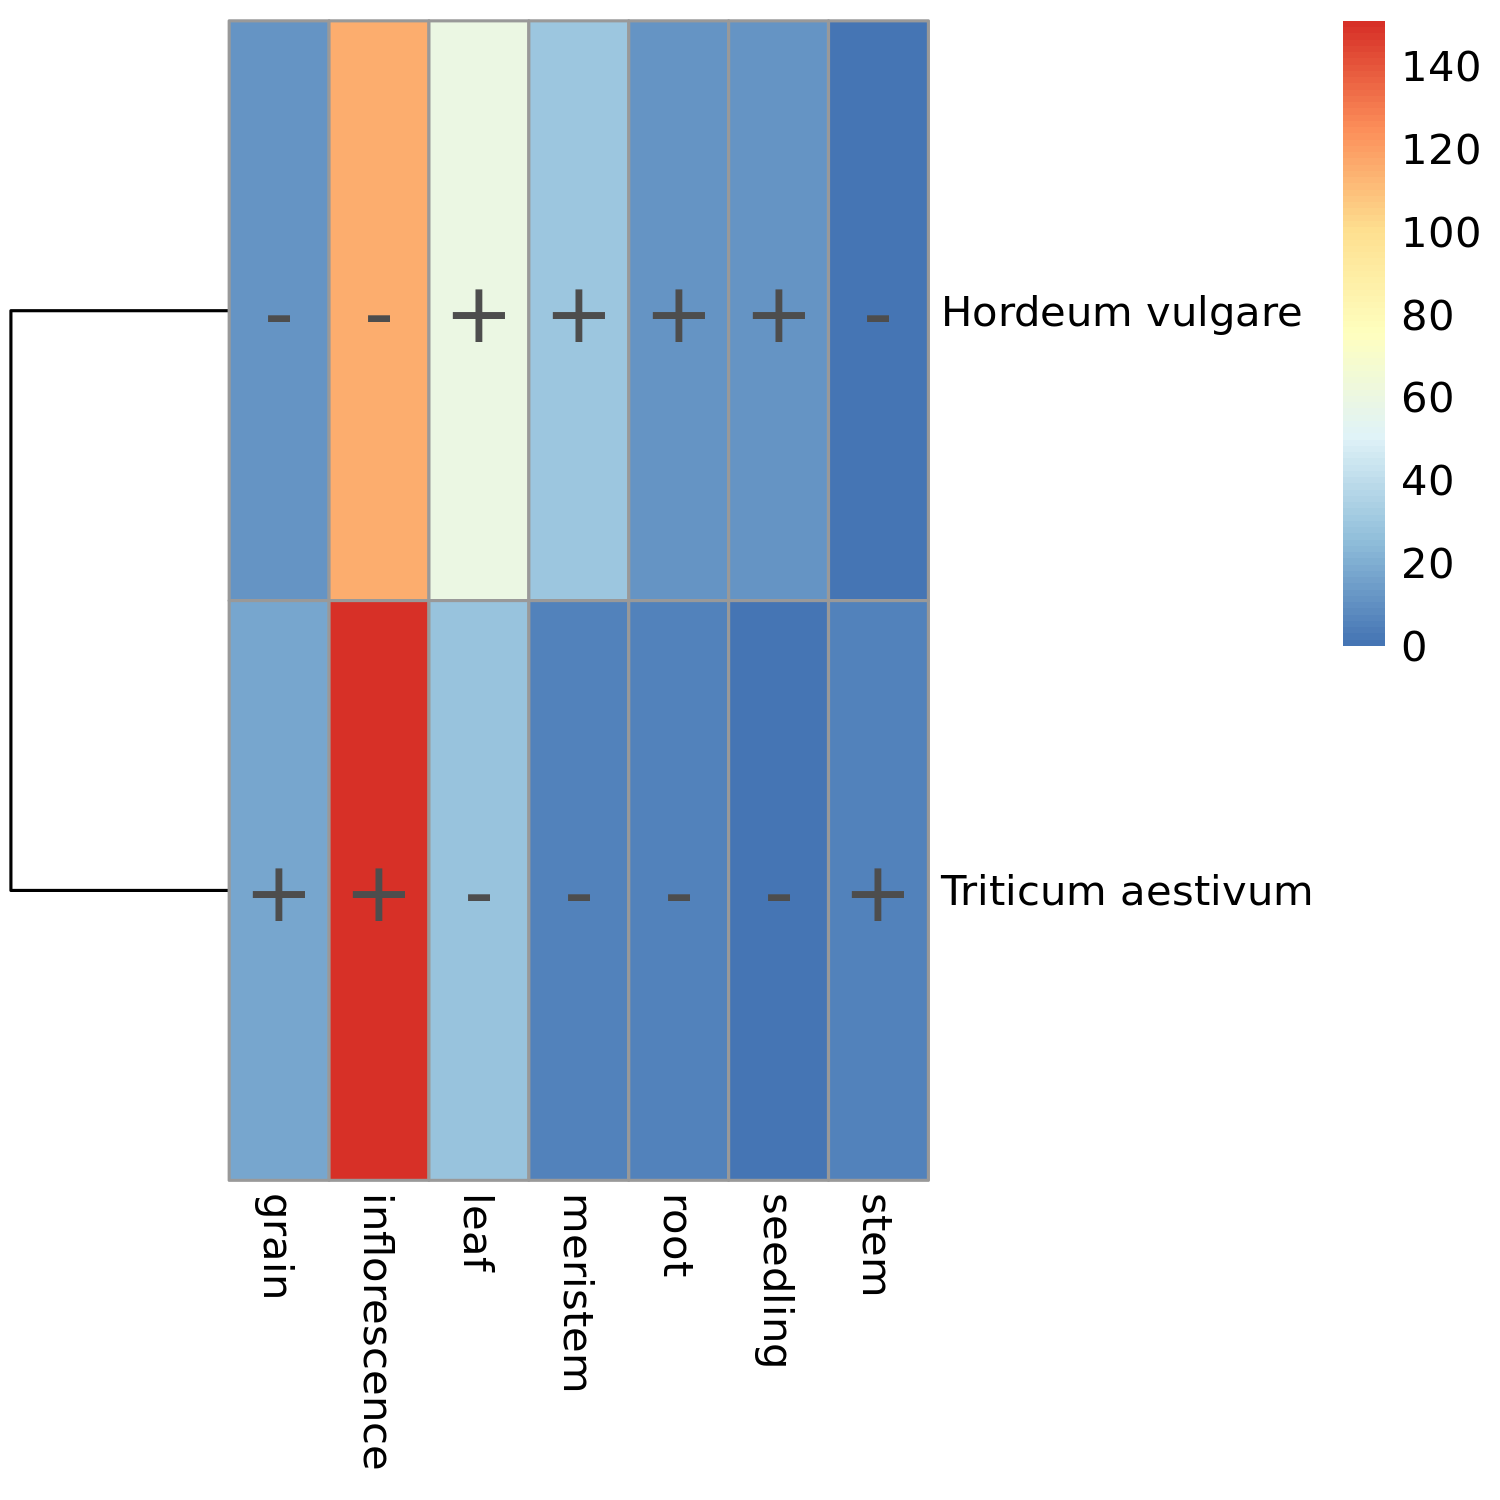

In [18]:
M=as.matrix(t)
#M=M[t$tip.label,t$tip.label]
head(M)
Q=residuals(chisq.test(M),type="pearson")
print(Q)
#diag(M)=NA #a[,1] #Extract or replace the diagonal of a matrix, or construct a diagonal matrix.
cutoff=0.2
QQ=ifelse(Q>0, ifelse(abs(Q)>cutoff,"+",""),ifelse(abs(Q)>cutoff,"-",""))
#diag(QQ)=""
hist(Q[upper.tri(Q)],breaks = 30)
abline(v=cutoff,col="red")
pheatmap(mat=M,scale="none",
         cluster_rows=TRUE,
         cluster_cols=FALSE,
         display_numbers=QQ,
         fontsize_number=20
        )

# 4. Heatmap with ggplot viridis

In [19]:
glimpse(mosaic)

Rows: 455
Columns: 6
$ Species             <chr> "Hordeum vulgare", "Hordeum vulgare", "Hordeum vu…
$ Zadok_scale         <fct> 9, 9, 9, 11, 11, 11, 11, 11, 11, 14, 14, 14, 14, …
$ Intermediate_age    <fct> Germination, Germination, Germination, Leaf_devel…
$ High_level_age      <fct> Seedling, Seedling, Seedling, Vegetative, Vegetat…
$ Intermediate_tissue <fct> apex, apex, apex, apex, apex, apex, apex, apex, a…
$ High_level_tissue   <fct> meristem, meristem, meristem, meristem, meristem,…


In [20]:
tissue1 <- mosaic %>% select(Species, Intermediate_tissue) %>% group_by(Species, Intermediate_tissue) %>% summarize(Sample_size = n())
glimpse(tissue1)
tissue2 <- mosaic %>% select(Species, High_level_tissue) %>% group_by(Species, High_level_tissue) %>% summarize(Sample_size = n())
age1 <- mosaic %>% select(Species, High_level_age) %>% group_by(Species, High_level_age) %>% summarize(Sample_size = n())
age2 <- mosaic %>% select(Species, Intermediate_age) %>% group_by(Species, Intermediate_age) %>% summarize(Sample_size = n())
age3 <- mosaic %>% select(Species, Zadok_scale) %>% group_by(Species, Zadok_scale) %>% summarize(Sample_size = n())

Rows: 34
Columns: 3
Groups: Species [2]
$ Species             <chr> "Hordeum vulgare", "Hordeum vulgare", "Hordeum vu…
$ Intermediate_tissue <fct> anther, apex, embryo, epidermis, glume, grain, le…
$ Sample_size         <int> 12, 29, 6, 6, 6, 12, 41, 6, 6, 6, 6, 6, 12, 6, 6,…


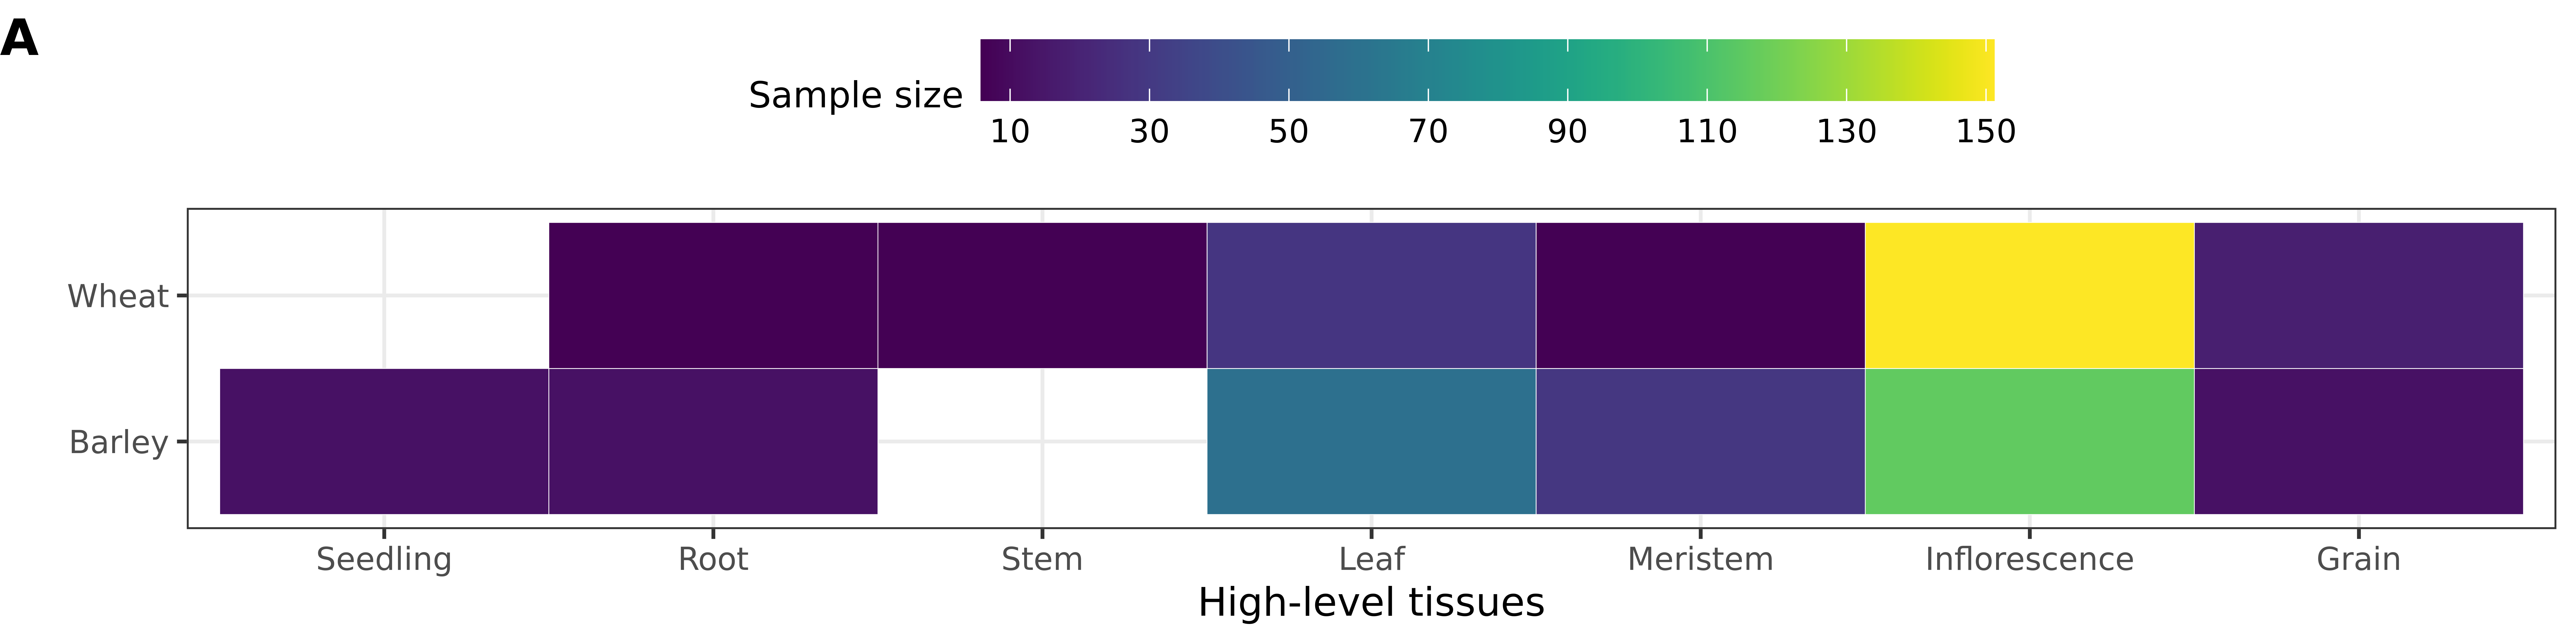

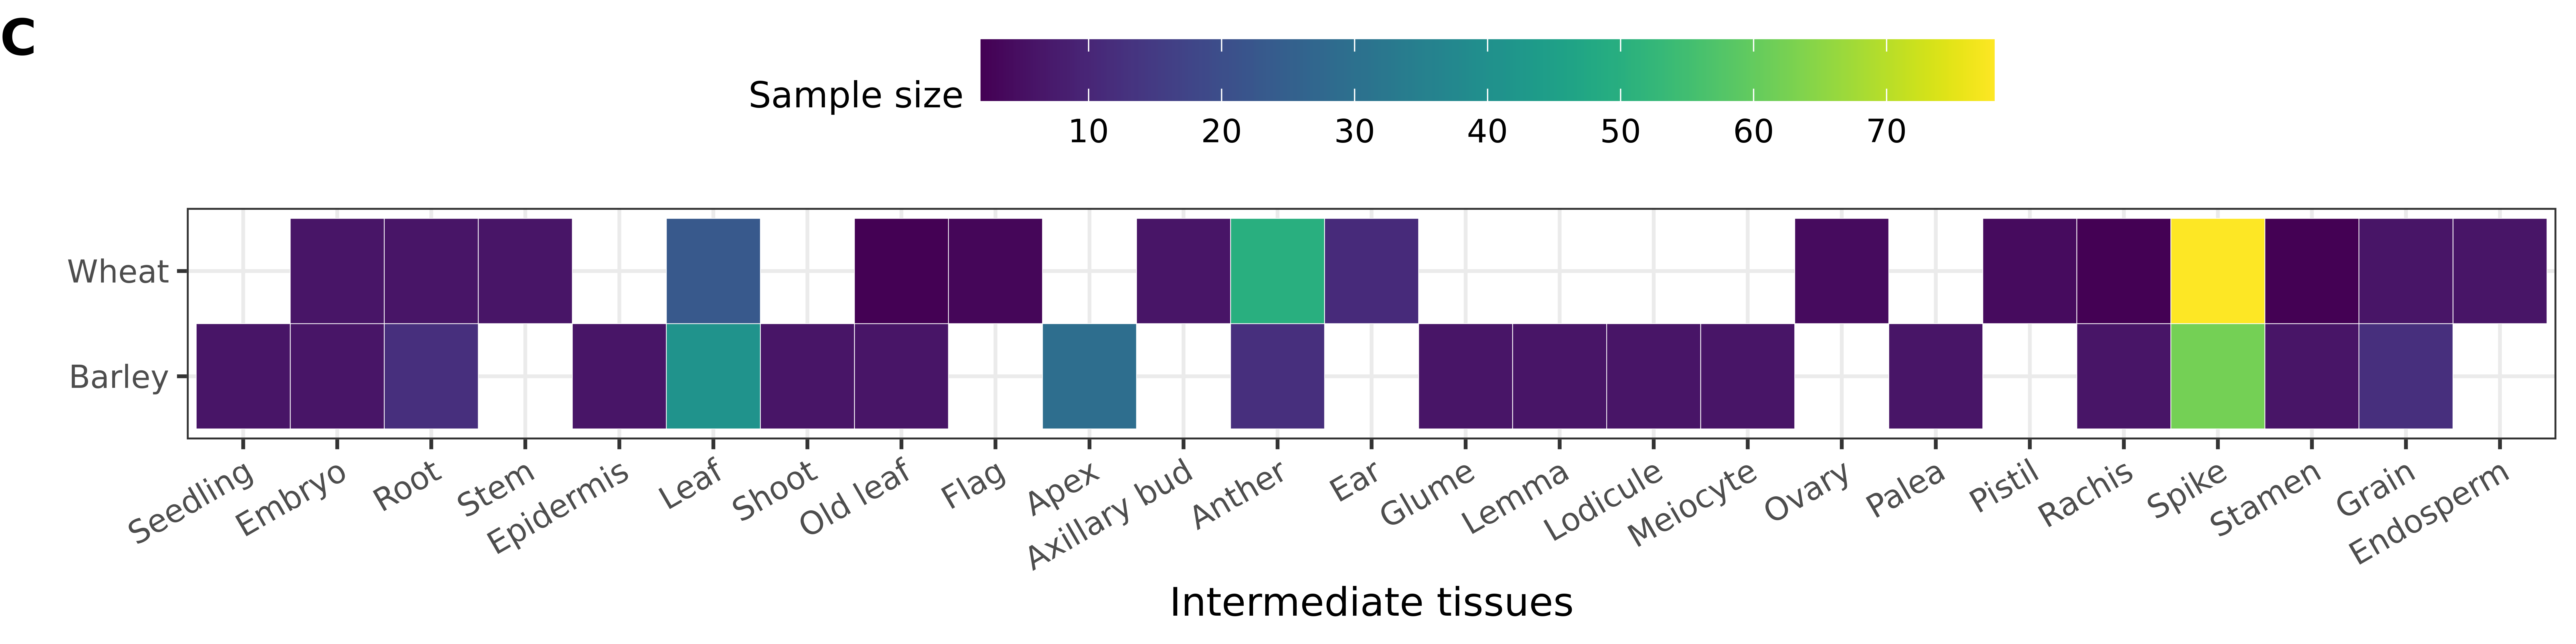

In [65]:
options(repr.plot.width = 10, repr.plot.height = 2, repr.plot.res = 300)
setwd("/home/vanda.marosi/floral_development_thesis_vm/figures/")
s1 <- ggplot(tissue2, aes(Species, High_level_tissue)) +
  geom_tile(aes(fill = Sample_size), colour = "white") +
    labs(x = "") +
    scale_x_discrete(labels = c("Barley", "Wheat")) +
    scale_y_discrete(limits = c("seedling", "root", "stem", "leaf", "meristem", "inflorescence", "grain"),
                     labels = c("Seedling", "Root",  "Stem", "Leaf", "Meristem", "Inflorescence", "Grain")) +
    labs(y = "High-level tissues") + 
    theme_bw() +
    coord_flip() +
    scale_fill_viridis(discrete = FALSE, breaks=c(10,30,50,70,90,110,130,150), guide_legend(title="Sample size  ")) +
    theme(legend.position="top", legend.key.width=unit(2, "cm"), legend.text=element_text(size=9), legend.title=element_text(size=10))

options(repr.plot.width = 10, repr.plot.height = 2.5, repr.plot.res = 300)
s2 <- ggplot(tissue1, aes(Species, Intermediate_tissue)) +
  geom_tile(aes(fill = Sample_size), colour = "white") +
    labs(x = "") +
    scale_x_discrete(labels = c("Barley", "Wheat")) +
    scale_y_discrete(limits = c("seedling", "embryo", 
                                "root", "stem", 
                                "epidermis", "leaf", "shoot", "senescence_leaf", "flag", 
                                "apex", "axillary bud", 
                                "anther", "ear", "glume", "lemma", "lodicule", "meiocyte", "ovary", "palea", "pistil", "rachis", "spike", "stamen",
                               "grain", "endosperm"),
                     labels = c("Seedling", "Embryo", 
                                "Root", "Stem", 
                                "Epidermis", "Leaf", "Shoot", "Old leaf", "Flag",  
                                "Apex", "Axillary bud", 
                                "Anther", "Ear", "Glume", "Lemma", "Lodicule", "Meiocyte", "Ovary", "Palea", "Pistil", "Rachis", "Spike", "Stamen",
                               "Grain", "Endosperm")) +
    labs(y = "Intermediate tissues") + 
    theme_bw() +                    
    coord_flip() +
    scale_fill_viridis(discrete = FALSE, breaks=c(10,20,30, 40, 50,60,70), guide = "colourbar", guide_legend(title="Sample size  ",)) +
    theme(legend.position="top", axis.text.x = element_text(angle = 30, hjust=1), legend.key.width=unit(2, "cm"), legend.text=element_text(size=9), legend.title=element_text(size=10))

options(repr.plot.width = 10, repr.plot.height = 2.5, repr.plot.res = 900)
mainh1 <- plot_grid(s1, labels = c( "A"), align = 'vh', hjust = 0, nrow = 1)
mainh2 <- plot_grid(s2, labels = c( "C"), align = 'vh', hjust = 0, nrow = 1)
mainh1
mainh2
ggsave("main2_meta01.pdf", plot = mainh1, width = 10, height = 2.5)
ggsave("main2_meta02.pdf", plot = mainh2, width = 10, height = 2.5)

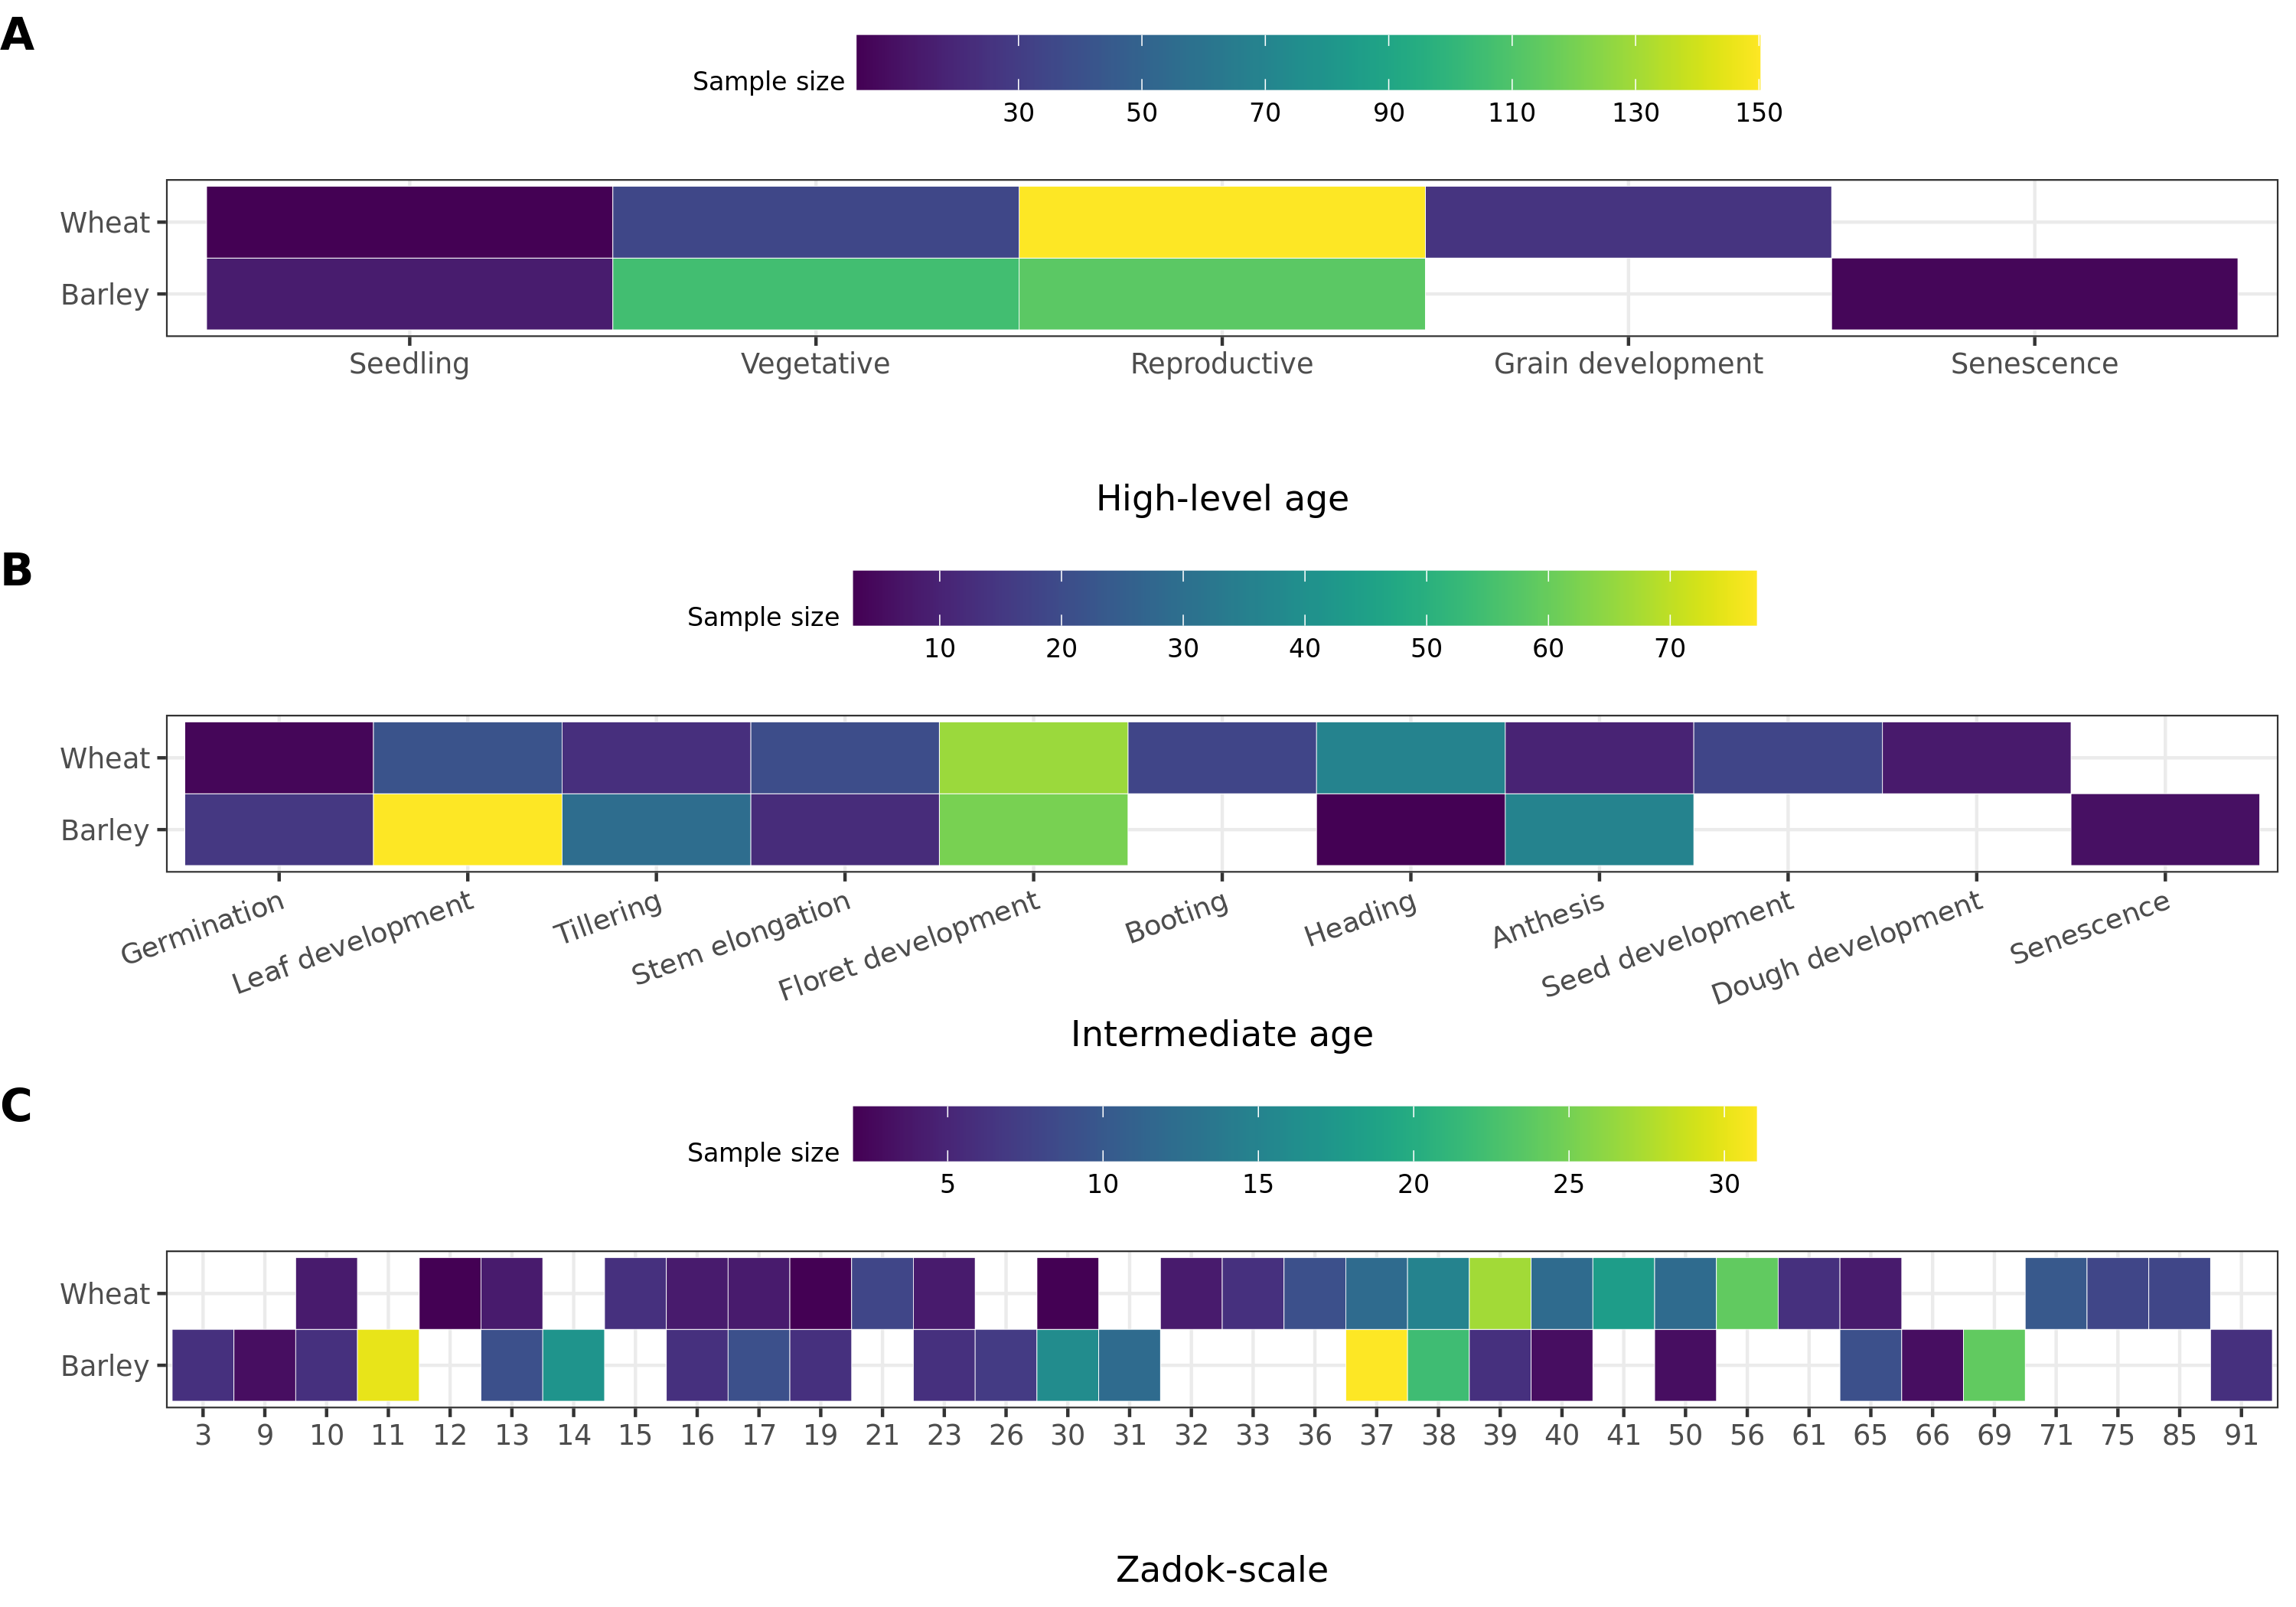

In [22]:
options(repr.plot.width = 10, repr.plot.height = 2, repr.plot.res = 300)
setwd("/home/vanda.marosi/floral_development_thesis_vm/figures/")
s3 <- ggplot(age1, aes(Species, High_level_age)) +
  geom_tile(aes(fill = Sample_size), colour = "white") +
    labs(x = "") +
    scale_x_discrete(labels = c("Barley", "Wheat")) +
    scale_y_discrete(limits = c("Seedling", "Vegetative", "Reproductive", "Grain_development", "Senescence"),
                    labels = c("Seedling", "Vegetative", "Reproductive", "Grain development", "Senescence")) +
    labs(y = "High-level age") + 
    theme_bw() +                    
    coord_flip() +
    scale_fill_viridis(discrete = FALSE, breaks=c(30,50,70,90,110,130,150), guide = "colourbar", guide_legend(title=" Sample size  ")) +
    theme(legend.position="top", legend.key.width=unit(2, "cm"), legend.text=element_text(size=8), legend.title=element_text(size=8))

options(repr.plot.width = 10, repr.plot.height = 2, repr.plot.res = 300)
s4 <- ggplot(age2, aes(Species, Intermediate_age)) +
  geom_tile(aes(fill = Sample_size), colour = "white") +
    labs(x = "") +
    scale_x_discrete(labels = c("Barley", "Wheat")) +
    scale_y_discrete(limits = c("Germination", "Leaf_development", "Tillering", "Stem_elongation", "Floret_development", "Booting", "Heading", "Anthesis",
                               "Seed_development", "Dough_development", "Senescence"),
                    labels = c("Germination", "Leaf development", "Tillering", "Stem elongation", "Floret development", "Booting", "Heading", "Anthesis",
                               "Seed development", "Dough development", "Senescence")) +
    labs(y = "Intermediate age") + 
    theme_bw() +                    
    coord_flip() +
    scale_fill_viridis(discrete = FALSE, breaks=c(10,20,30,40,50,60,70,80), guide = "colourbar", guide_legend(title="Sample size  ")) +
    theme(legend.position="top", axis.text.x = element_text(angle = 20, hjust=1), legend.key.width=unit(2, "cm"), legend.text=element_text(size=8), legend.title=element_text(size=8))

options(repr.plot.width = 10, repr.plot.height = 2, repr.plot.res = 300)
s5 <- ggplot(age3, aes(Species, Zadok_scale)) +
  geom_tile(aes(fill = Sample_size), colour = "white") +
    labs(x = "") +
    scale_x_discrete(labels = c("Barley", "Wheat")) +
    labs(y = "Zadok-scale") + 
    theme_bw() +                    
    coord_flip() +
    scale_fill_viridis(discrete = FALSE, breaks=c(5,10,15,20,25,30,35,40), guide = "colourbar", guide_legend(title="Sample size  ")) +
    theme(legend.position="top", legend.key.width=unit(2, "cm"), legend.text=element_text(size=8), legend.title=element_text(size=8))

options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 300)
mainh2 <- plot_grid(s3, s4, s5, labels = c( "A", "B", "C"), align = 'vh', hjust = 0, nrow = 3)
mainh2
ggsave("main3_meta.pdf", plot = mainh2, width = 10, height = 7)

In [23]:
extra <- mosaic %>% select(Species, Intermediate_tissue, Zadok_scale) %>% group_by(Species, Intermediate_tissue, Zadok_scale) %>% summarize(Sample_size = n())
extra1 <- mosaic %>% select(Species, High_level_tissue, Zadok_scale) %>% group_by(Species, High_level_tissue, Zadok_scale) %>% summarize(Sample_size = n())
glimpse(extra) 

Rows: 82
Columns: 4
Groups: Species, Intermediate_tissue [34]
$ Species             <chr> "Hordeum vulgare", "Hordeum vulgare", "Hordeum vu…
$ Intermediate_tissue <fct> anther, anther, anther, anther, apex, apex, apex,…
$ Zadok_scale         <fct> 37, 38, 39, 40, 9, 11, 14, 17, 3, 13, 19, 65, 69,…
$ Sample_size         <int> 3, 3, 3, 3, 3, 9, 8, 9, 6, 6, 6, 6, 6, 9, 9, 7, 1…


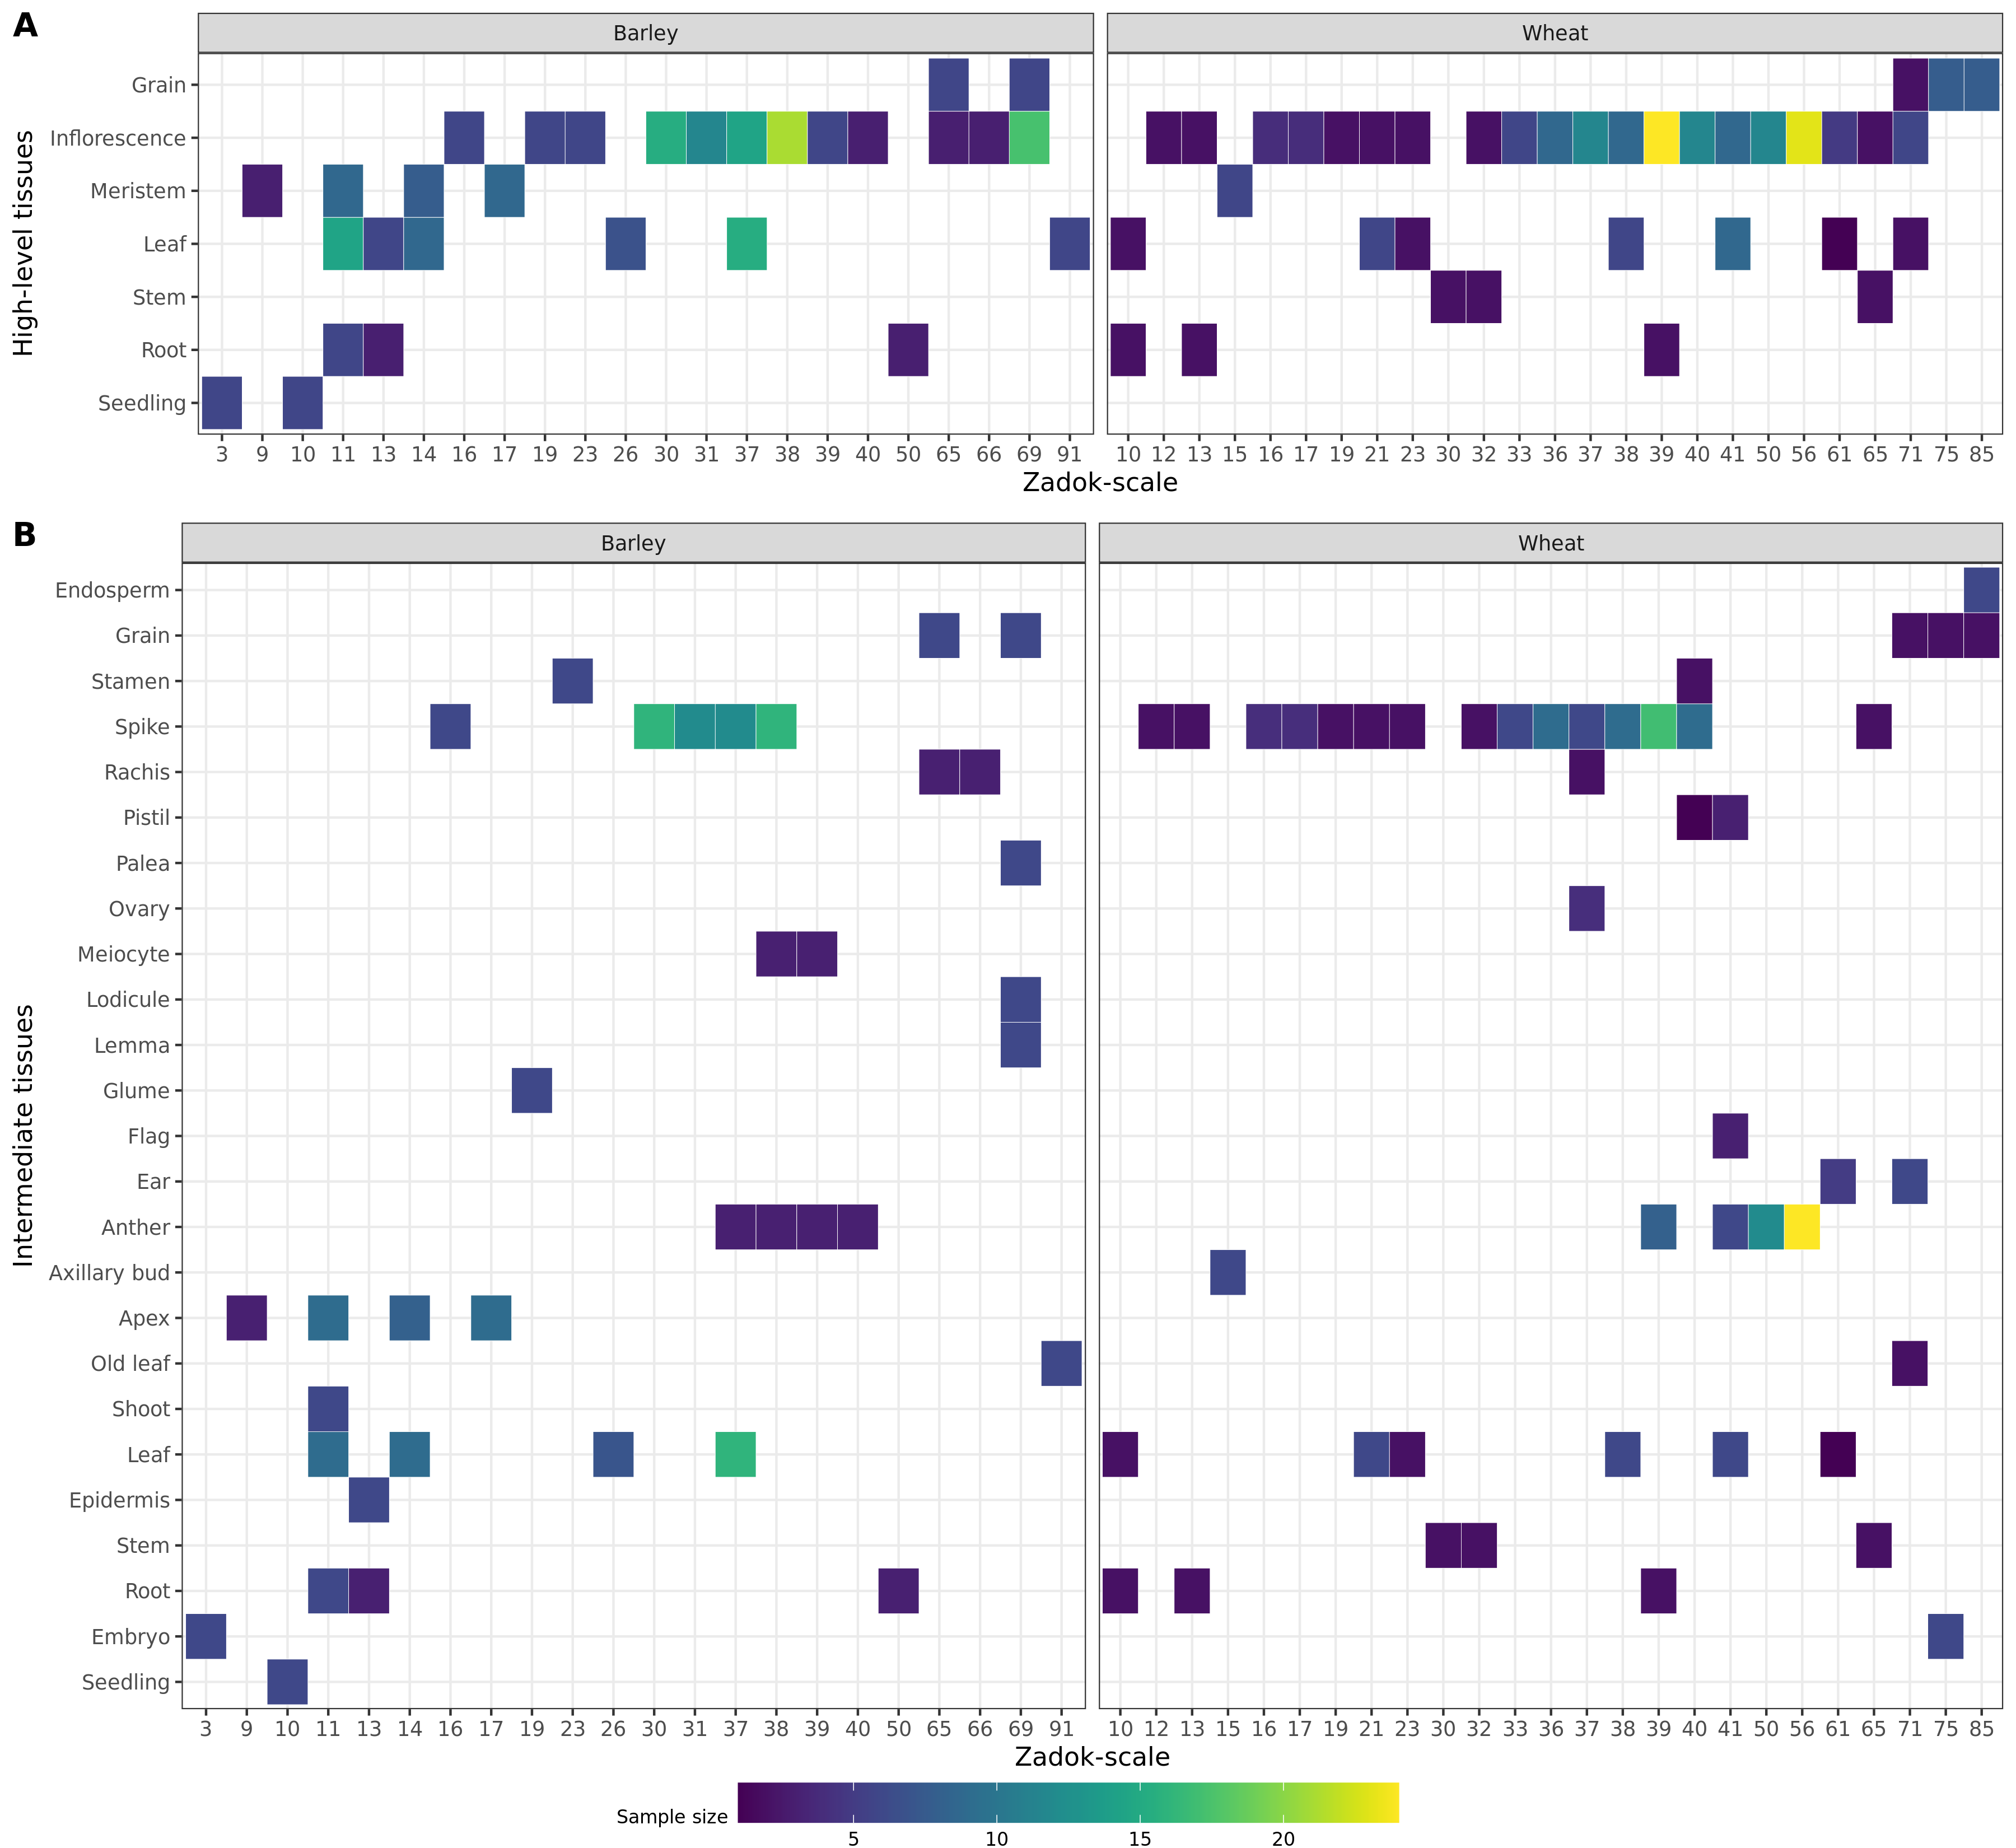

In [24]:
labs <- c("Barley", "Wheat")
names(labs) <- c("Hordeum vulgare", "Triticum aestivum")
e1 <- ggplot(extra, aes(x = Intermediate_tissue, y = Zadok_scale)) +
  geom_tile(aes(fill = Sample_size), colour = "white") +
    facet_wrap( ~ Species, labeller = labeller(Species = labs), scales= "free_x", shrink = FALSE) +
    labs(x = "Intermediate tissues", y = "Zadok-scale") + 
    scale_x_discrete(limits = c("seedling", "embryo", 
                                "root", "stem", 
                                "epidermis", "leaf", "shoot", "senescence_leaf",  
                                "apex", "axillary bud", 
                                "anther", "ear", "flag", "glume", "lemma", "lodicule", "meiocyte", "ovary", "palea", "pistil", "rachis", "spike", "stamen",
                               "grain", "endosperm"),
                     labels = c("Seedling", "Embryo", 
                                "Root", "Stem", 
                                "Epidermis", "Leaf", "Shoot", "Old leaf",  
                                "Apex", "   Axillary bud", 
                                "Anther", "Ear", "Flag", "Glume", "Lemma", "Lodicule", "Meiocyte", "Ovary", "Palea", "Pistil", "Rachis", "Spike", "Stamen",
                               "Grain", "Endosperm")) +
    theme_bw() +                    
    coord_flip() +
    scale_fill_viridis(discrete = FALSE, breaks=c(5,10,15,20,25,30), guide = "colourbar", guide_legend(title="Sample size  ")) +
    theme(legend.position="bottom", legend.key.width=unit(2, "cm"), legend.text=element_text(size=8), legend.title=element_text(size=8))
e2 <- ggplot(extra1, aes(x = High_level_tissue, y = Zadok_scale)) +
  geom_tile(aes(fill = Sample_size), colour = "white") +
    facet_wrap( ~ Species, labeller = labeller(Species = labs), scales= "free_x", shrink = FALSE) +
    labs(x = "High-level tissues", y = "Zadok-scale") + 
    scale_x_discrete(limits = c("seedling", "root", "stem", "leaf", "meristem", "inflorescence", "grain"),
                     labels = c("Seedling", "Root",  "Stem", "Leaf", "Meristem", "   Inflorescence", "Grain")) +
    theme_bw() +                    
    coord_flip() +
    scale_fill_viridis(discrete = FALSE, breaks=c(5,10,15,20), guide = "colourbar", guide_legend(title="Sample size  ")) +
    theme(legend.position="none")

options(repr.plot.width = 12, repr.plot.height =11, repr.plot.res = 300)
legend <- get_legend(e1 + guides(color = guide_legend(nrow = 1)) + theme(legend.position = "bottom"))
sup3 <- plot_grid(e2, e1 + theme(legend.position="none"), legend, labels = c( "A", "B"), nrow = 3, rel_heights = c(.4, 1, .05))
sup3
ggsave("sup3_meta.pdf", plot = sup3, width = 12, height = 11)

In [33]:
# import umap tables to create combined figures
setwd("/home/vanda.marosi/floral_development_thesis_vm/")
w <- readRDS("cnt_filt_wheat.rds")
b <- readRDS("cnt_log_meta_barley.rds")
head(w, 3)
head(b, 3)

TraesCHI1A01G000100 TraesCHI1A01G000200 TraesCHI1A01G000300
SRR10737427 0                   0                   0                  
SRR10737428 0                   0                   0                  
SRR10737429 0                   0                   0                  
            TraesCHI1A01G000400 TraesCHI1A01G000500 TraesCHI1A01G000600
SRR10737427 0                   1                   193.395199         
SRR10737428 0                   8                     2.465932         
SRR10737429 0                   7                   159.483818         
            TraesCHI1A01G000700 TraesCHI1A01G000800 TraesCHI1A01G000900
SRR10737427 79.129559           26.43591            2193.41931         
SRR10737428  3.067772            0.00000              36.62236         
SRR10737429 32.490120           11.19757             540.82720         
            TraesCHI1A01G001000 ⋯ TraesCHIUn01G315300 TraesCHIUn01G315400
SRR10737427 66.637813           ⋯ 0                   3.666667           
SRR10737428  2.055517           ⋯ 0                   1.333333           
SRR10737429 25.764597           ⋯ 0                   2.000000           
            TraesCHIUn01G315500 TraesCHIUn01G315600 TraesCHIUn01G315700
SRR10737427 917.5968            0                   0.00000e+00        
SRR10737428 607.7202            0                   3.46474e-08        
SRR10737429 473.4854            0                   0.00000e+00        
            TraesCHIUn01G315800 TraesCHIUn01G315900 TraesCHIUn01G316000
SRR10737427 0                   0                   0                  
SRR10737428 0                   0                   0                  
SRR10737429 0                   0                   0                  
            TraesCHIUn01G316100 TraesCHIUn01G316200
SRR10737427 5167.999            0                  
SRR10737428 5014.163            0                  
SRR10737429 2455.121            0

dataset                        cultivar  instrument          library
ERR781039 photoperiod_mutant_preanthesis S42-IL107 Illumina HiSeq 2000 single 
ERR781040 photoperiod_mutant_preanthesis S42-IL107 Illumina HiSeq 2000 single 
ERR781041 photoperiod_mutant_preanthesis S42-IL107 Illumina HiSeq 2000 single 
          gm growth_condition intermediate_age high_level_age
ERR781039 wt incubator        Germination      Seedling      
ERR781040 wt incubator        Germination      Seedling      
ERR781041 wt incubator        Germination      Seedling      
          intermediate_tissue high_level_tissue ⋯ Horvu_MOREX_Un01G109600
ERR781039 apex                meristem          ⋯ 0                      
ERR781040 apex                meristem          ⋯ 0                      
ERR781041 apex                meristem          ⋯ 0                      
          Horvu_MOREX_Un01G109700 Horvu_MOREX_Un01G109800
ERR781039 0                       1.910433               
ERR781040 0                       2.764233               
ERR781041 0                       0.000000               
          Horvu_MOREX_Un01G109900 Horvu_MOREX_Un01G110000
ERR781039 0                       3.107582               
ERR781040 0                       0.000000               
ERR781041 0                       0.000000               
          Horvu_MOREX_Un01G110100 Horvu_MOREX_Un01G110300
ERR781039 1.584963                1                      
ERR781040 0.000000                0                      
ERR781041 1.000000                0                      
          Horvu_MOREX_Un01G110400 Horvu_MOREX_Un01G110500
ERR781039 0                       0.2031522              
ERR781040 0                       1.8073549              
ERR781041 0                       0.0000000              
          Horvu_MOREX_Un01G110600
ERR781039 0.00000000             
ERR781040 0.05578695             
ERR781041 0.00000000

In [40]:
# create barley subfigures
set.seed(42) # For reproducibility of results

umap_data_log = b[, grep("Horvu", colnames(b))]
umap_labels_log = b[1:13]
u_log <- umap(umap_data_log)
u_log
u_log_df <- as.data.frame(u_log$layout)
glimpse(u_log_df)

umap embedding of 240 items in 2 dimensions
object components: layout, data, knn, config


Rows: 240
Columns: 2
$ V1 <dbl> -5.7980753, -5.5153158, -5.5060254, -5.5787333, -5.8260880, -5.856…
$ V2 <dbl> -8.546497, -8.028004, -7.920592, -8.217823, -8.445112, -8.429644, …


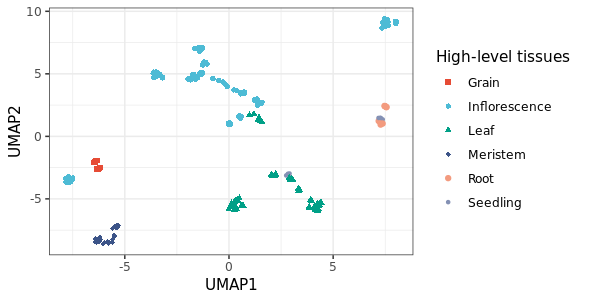

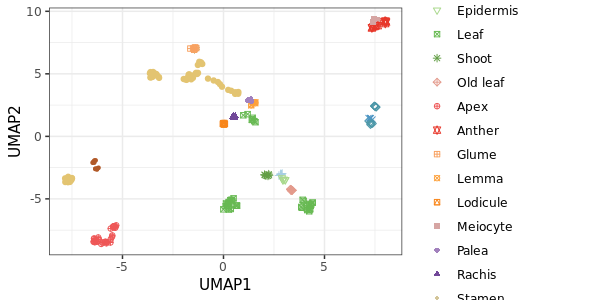

In [43]:

cols <- colorRampPalette(brewer.pal(12, "Paired"))
myPal <- cols(length(unique(b$intermediate_tissue)))

options(repr.plot.width = 6, repr.plot.height = 3, repr.plot.res = 100)
b4 <- ggplot(u_log_df, aes(x = V1, y = V2, color = umap_labels_log$high_level_tissue, shape = umap_labels_log$high_level_tissue)) + 
                xlab("UMAP1") + 
                ylab("UMAP2") +
                geom_point() +
                scale_colour_npg(palette = c("nrc"), alpha = 1, name = "High-level tissues  ",
                                labels = c("Grain", "Inflorescence ", "Leaf", "Meristem", "Root", "Seedling")) +
                scale_shape_manual(name = "High-level tissues  ", labels = c("Grain", "Inflorescence ", "Leaf", "Meristem", "Root", "Seedling"),
                      values = c(15, 16, 17, 18, 19, 20)) +
                theme_bw()
b5 <- ggplot(u_log_df, aes(x = V1, y = V2, color = umap_labels_log$intermediate_tissue, shape = umap_labels_log$intermediate_tissue)) + 
                xlab("UMAP1") + 
                ylab("UMAP2") +
                geom_point() +
                scale_colour_manual(values = myPal,  name = "Intermediate tissues", 
                                    limits = c("seedling", "embryo", "root", 
                                       "epidermis", "leaf", "shoot", "senescence_leaf", "apex",
                                      "anther", "glume", "lemma", "lodicule", "meiocyte", "palea", "rachis", "stamen", "spike", 
                                      "grain"),
                                    labels = c("Seedling", "Embryo", "Root", 
                                       "Epidermis", "Leaf", "Shoot", "Old leaf", "Apex",
                                      "Anther", "Glume", "Lemma", "Lodicule", "Meiocyte", "Palea", "Rachis", "Stamen","Spike", 
                                      "Grain")) +
                scale_shape_manual(name = "Intermediate tissues",
                                   limits = c("seedling", "embryo", "root", 
                                       "epidermis", "leaf", "shoot", "senescence_leaf", "apex",
                                      "anther", "glume", "lemma", "lodicule", "meiocyte", "palea", "rachis", "stamen", "spike", 
                                      "grain"),
                                   labels = c("Seedling", "Embryo", "Root", 
                                       "Epidermis", "Leaf", "Shoot", "Old leaf", "Apex",
                                      "Anther", "Glume", "Lemma", "Lodicule", "Meiocyte", "Palea", "Rachis", "Stamen", "Spike", 
                                      "Grain"),
                                   values = c(3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20)) +
                theme_bw() 
b4
b5

In [44]:
#create wheat subfigures
set.seed(42) # For reproducibility of results

umap_f_data = w[, grep("Traes", colnames(w))]
umap_f_labels = w[1:22]
#create umap table
uf <- umap(umap_f_data)
uf
#inspect table
head(uf$layout, 3)
urf <- as.data.frame(uf$layout)
glimpse(urf)

umap embedding of 215 items in 2 dimensions
object components: layout, data, knn, config


[,1]       [,2]    
SRR10737427 -1.7719619 6.029539
SRR10737428 -0.8810588 7.637936
SRR10737429 -1.8832629 6.135105

Rows: 215
Columns: 2
$ V1 <dbl> -1.7719619, -0.8810588, -1.8832629, -1.6509511, -1.4282664, -1.755…
$ V2 <dbl> 6.029539, 7.637936, 6.135105, 6.485400, 7.162951, 6.623171, 5.8895…


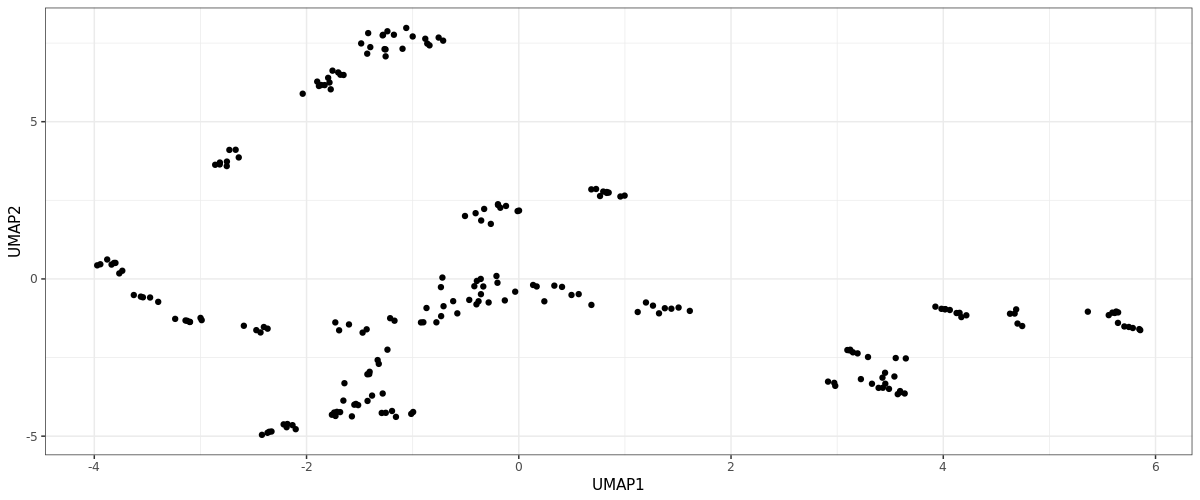

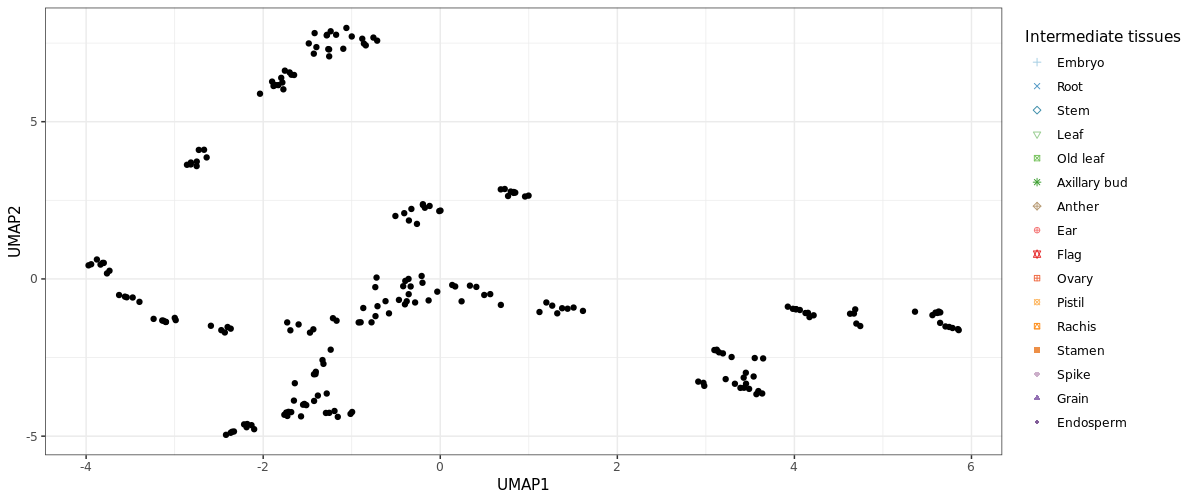

In [51]:
nb.cols <- 19
mycolors <- colorRampPalette(brewer.pal(12, "Paired"))(nb.cols)

options(repr.plot.width = 6, repr.plot.height = 3, repr.plot.res = 300)
rfb4 <- ggplot(urf, aes(x = V1, y = V2, color = umap_f_labels$high_level_tissue, shape = umap_f_labels$high_level_tissue)) + 
                xlab("UMAP1") + 
                ylab("UMAP2") +
                geom_point() +
                scale_color_npg(palette = c("nrc"), alpha = 1, name = "High-level tissues", 
                                 labels = c("Grain", "Inflorescence", "Leaf", "Meristem", "Root", "Stem")) +
                scale_shape_manual(name = "High-level tissues", labels = c("Grain", "Inflorescence", "Leaf", "Meristem", "Root", "Stem"), 
                                    values = c(15, 16, 17, 18, 19, 20)) +
                theme_bw()

rfb5 <- ggplot(urf, aes(x = V1, y = V2, color = umap_f_labels$intermediate_tissue, shape = umap_f_labels$intermediate_tissue)) + 
                xlab("UMAP1") + 
                ylab("UMAP2") +
                geom_point() +
                scale_color_manual(values = mycolors,  name = "Intermediate tissues",
                                   limits = c("embryo", "root", "stem",
                                       "leaf", "senescence_leaf", "axillary bud",
                                      "anther", "ear", "flag", "ovary", "pistil", "rachis", "stamen", "spike",
                                      "grain", "endosperm"),
                                   labels = c("Embryo", "Root", "Stem",
                                       "Leaf", "Old leaf", "Axillary bud",
                                      "Anther", "Ear", "Flag", "Ovary", "Pistil", "Rachis", "Stamen", "Spike",
                                      "Grain", "Endosperm")) +
                scale_shape_manual(name = "Intermediate tissues",
                                   limits = c("embryo", "root", "stem",
                                       "leaf", "senescence_leaf", "axillary bud",
                                      "anther", "ear", "flag", "ovary", "pistil", "rachis", "stamen", "spike",
                                      "grain", "endosperm"),
                                    labels = c("Embryo", "Root", "Stem",
                                       "Leaf", "Old leaf", "Axillary bud",
                                      "Anther", "Ear", "Flag", "Ovary", "Pistil", "Rachis", "Stamen", "Spike",
                                      "Grain", "Endosperm"),
                                   values = c(3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20)) +
                theme_bw() 
rfb4
rfb5

In [25]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/vanda.marosi/anaconda3/envs/r/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_DE.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] svglite_1.2.3.2    pheatmap_1.0.12    vcd_1.4-8          ggsci_2.9         
 [5] patchwork_1.0.1    cowplot_1.0.0      viridis_0.5.1      viridisLite_0.3.0 
 [9] RColorBrewer_1.1-2 forcats_0.5.0      stringr_1.4.0      dplyr_0.8.5       
[13] purrr_0.3.4        readr_1.3.1     